In [1]:
# Import de matplot et paramétrage
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd
import operator

from sklearn import model_selection, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

plt.rcParams.update({'figure.max_open_warning': 0})
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Phase I : Exploration des données

In [2]:
%run PSante_01_CleaningNotebook.ipynb

In [3]:
# chargement du dataset original
# disponible à l'adresse :
# https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv
df = pd.read_csv('openfood_data.csv', sep='\t',
                 encoding='UTF-8', low_memory=False)

In [4]:
# Préparation des colonnes numériques du dF pour nettoyage
df_num = df.iloc[:, 70:]
drop_col(df_num, 2/1000, True)

# Création du dF
df_cleaned = pd.DataFrame()

# Réalisation du 1er nettoyage
for i in df_num:
    ser = df_num[i]
    ser = ser[np.abs(ser - ser.mean()) / ser.std() < 3]
    df_cleaned = df_cleaned.append(ser)

# Transpose
df_cleaned = df_cleaned.T

Drop des colonnes dont le nombre de valeurs réelles < 1856 : df.shape = (928280, 44)


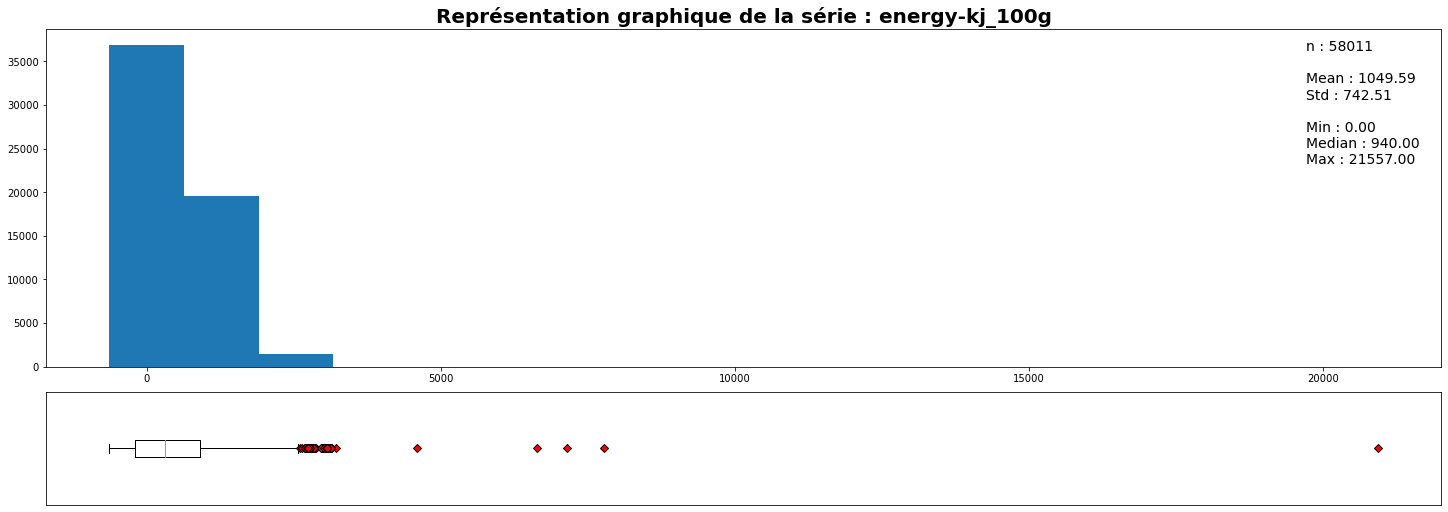

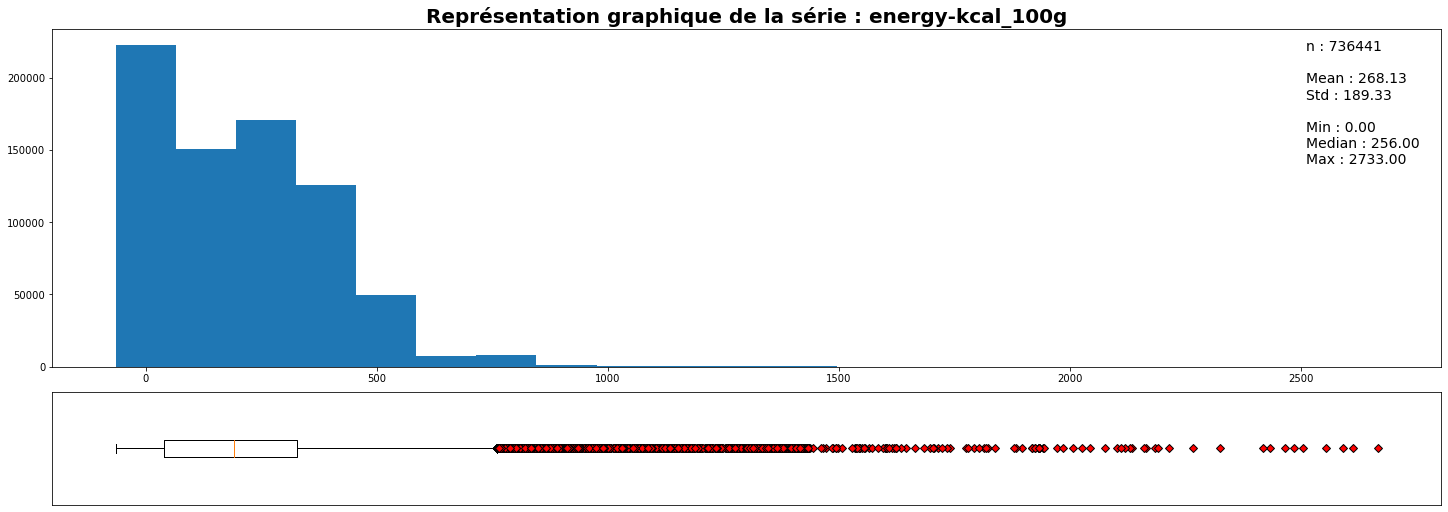

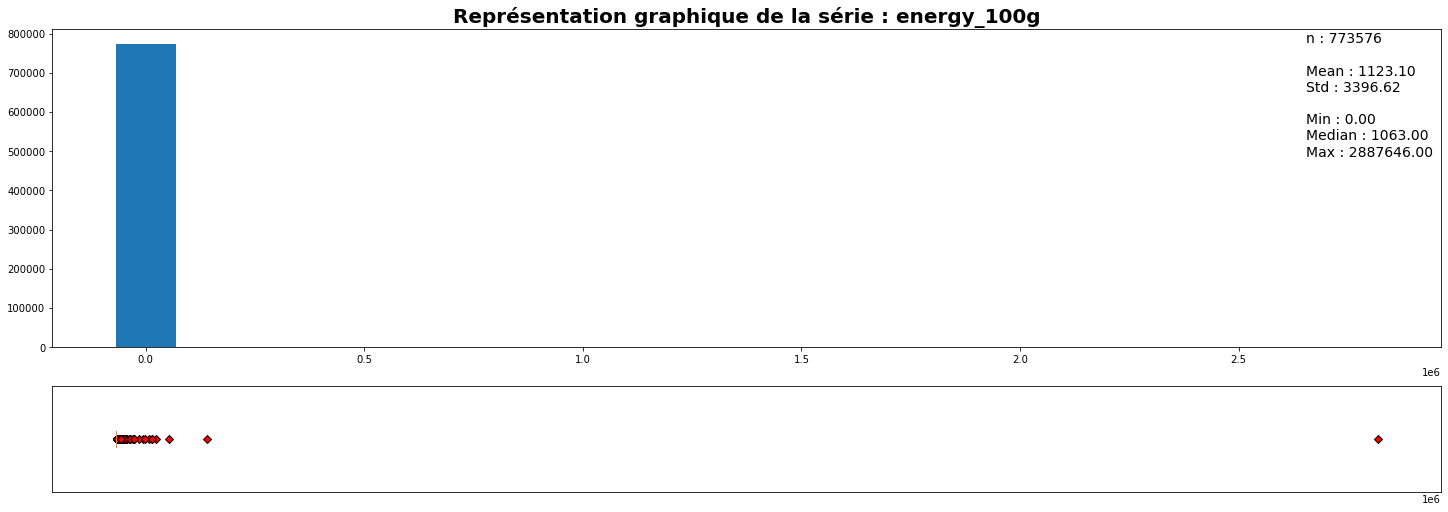

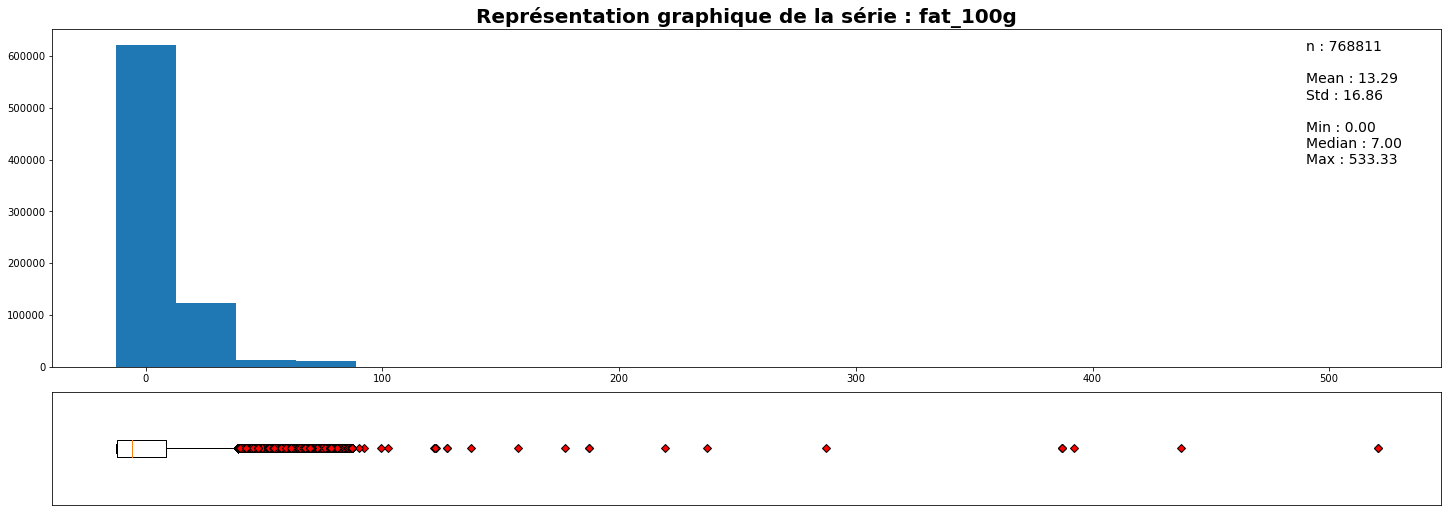

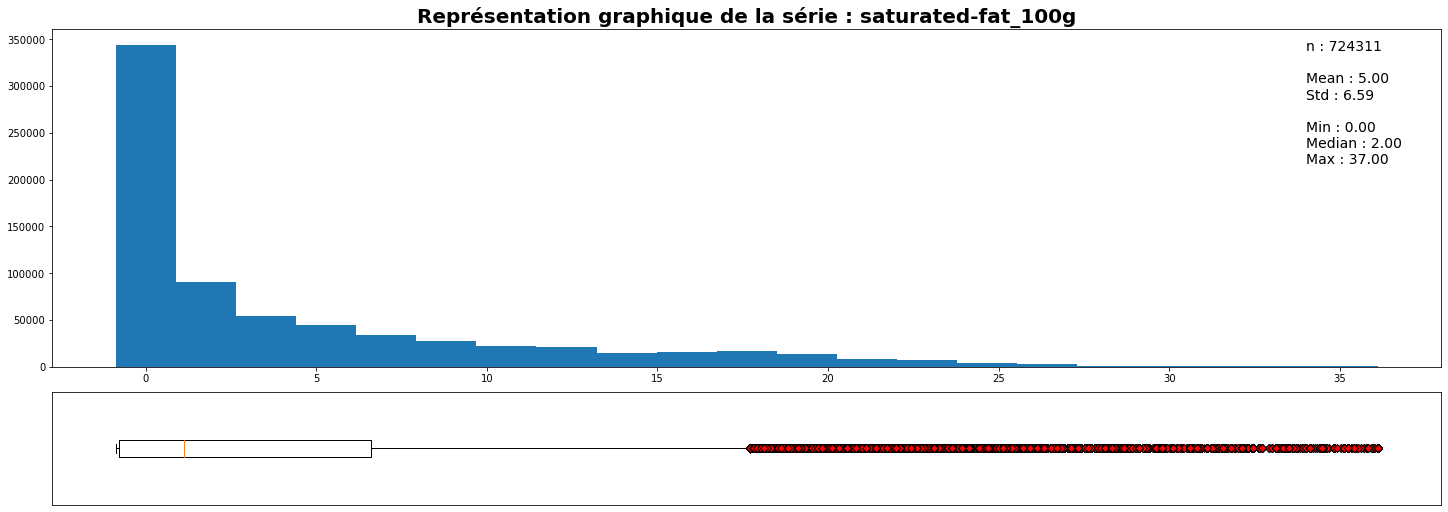

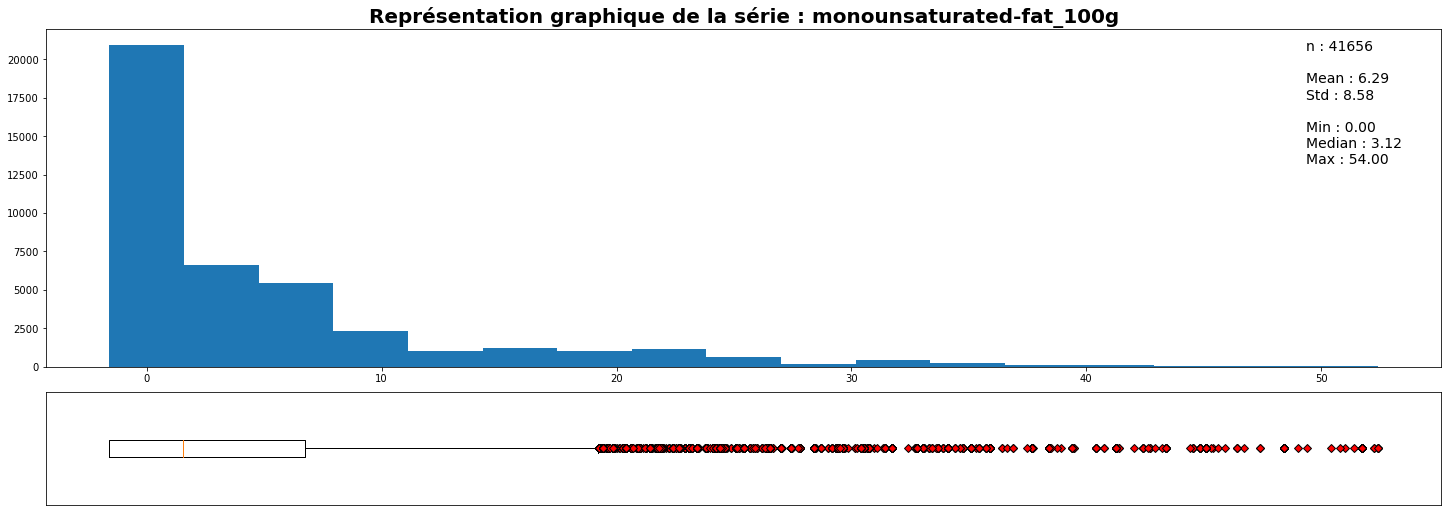

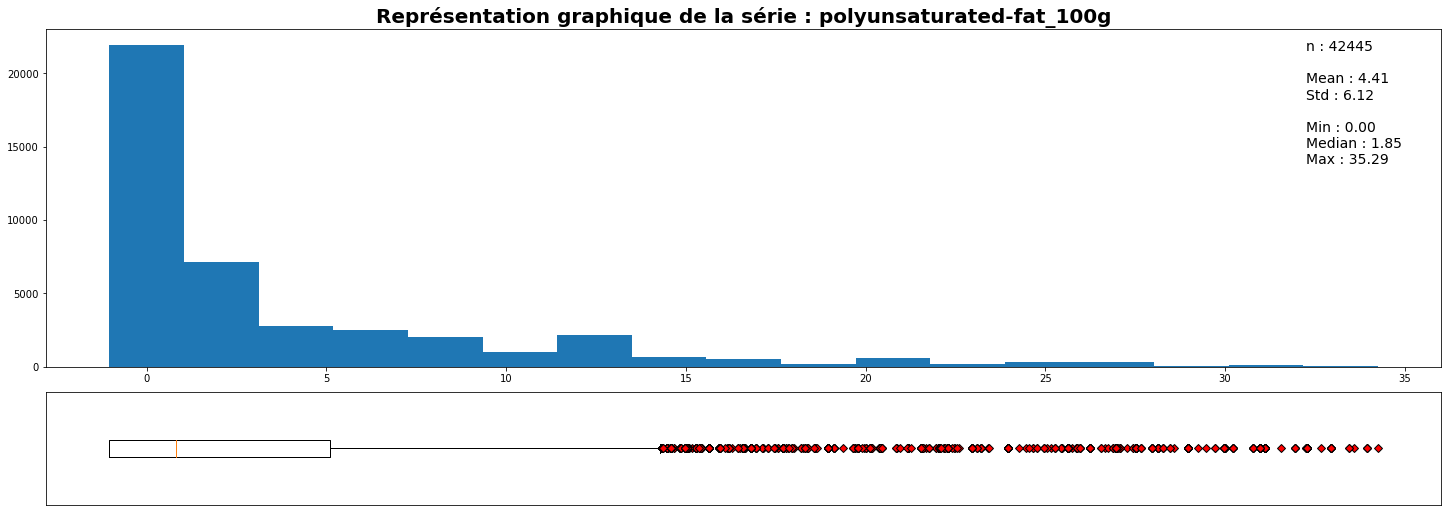

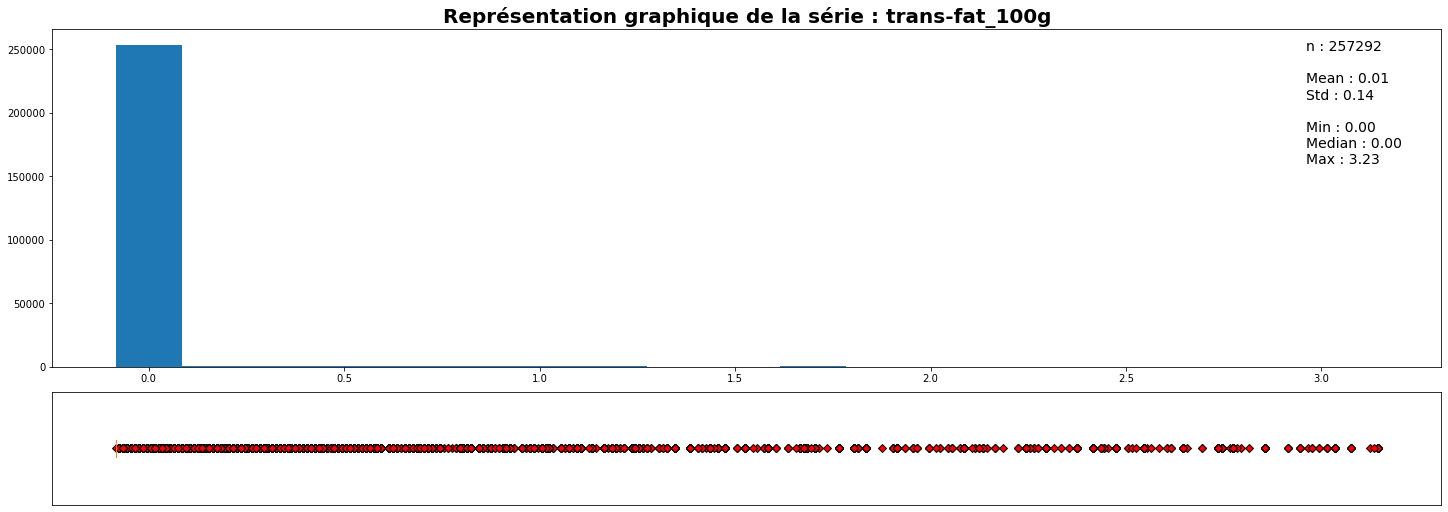

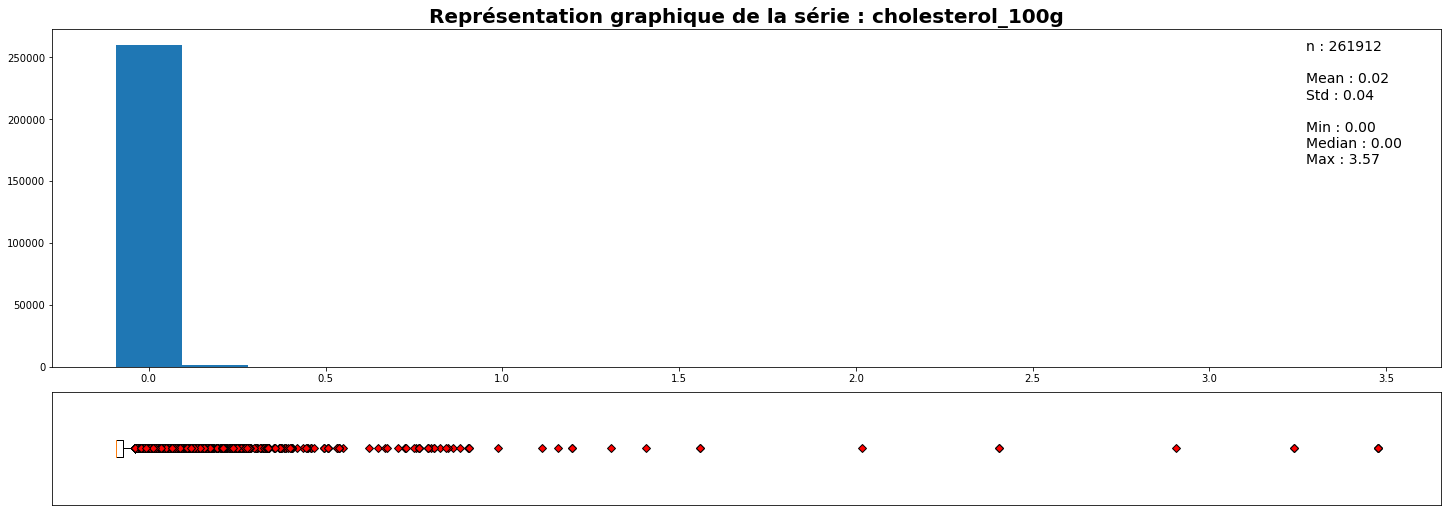

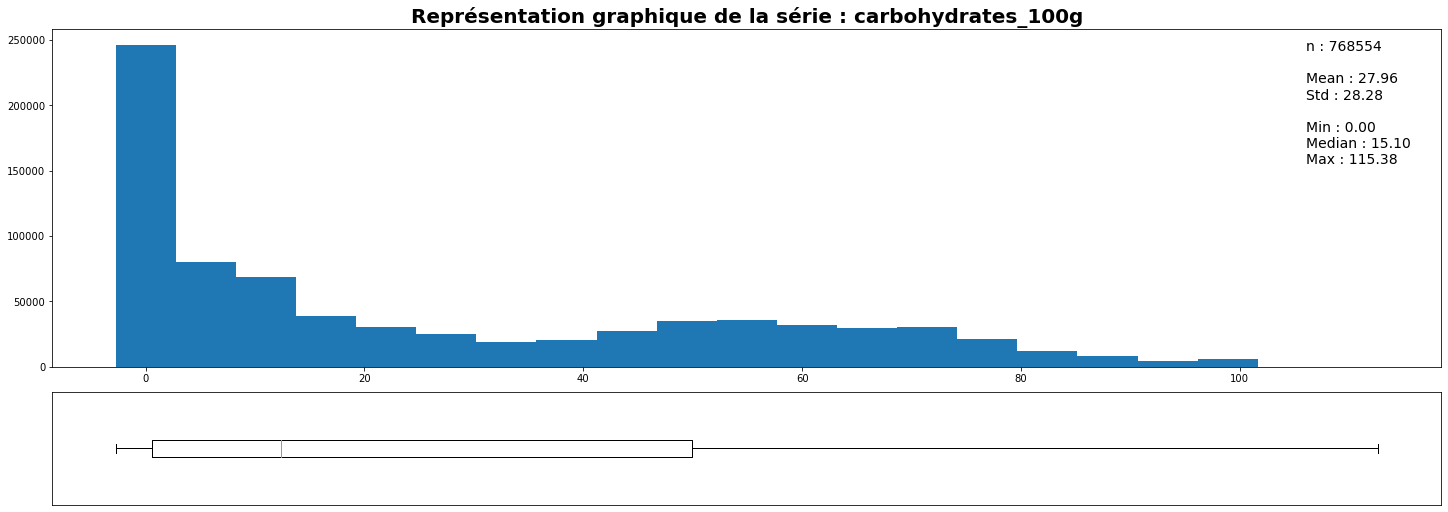

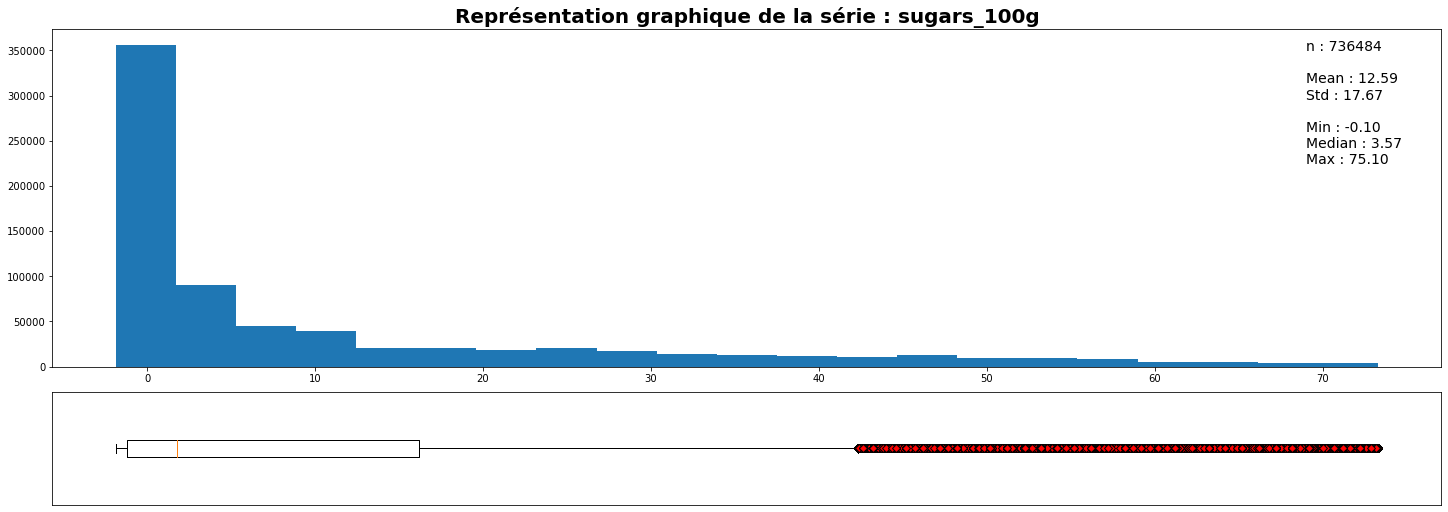

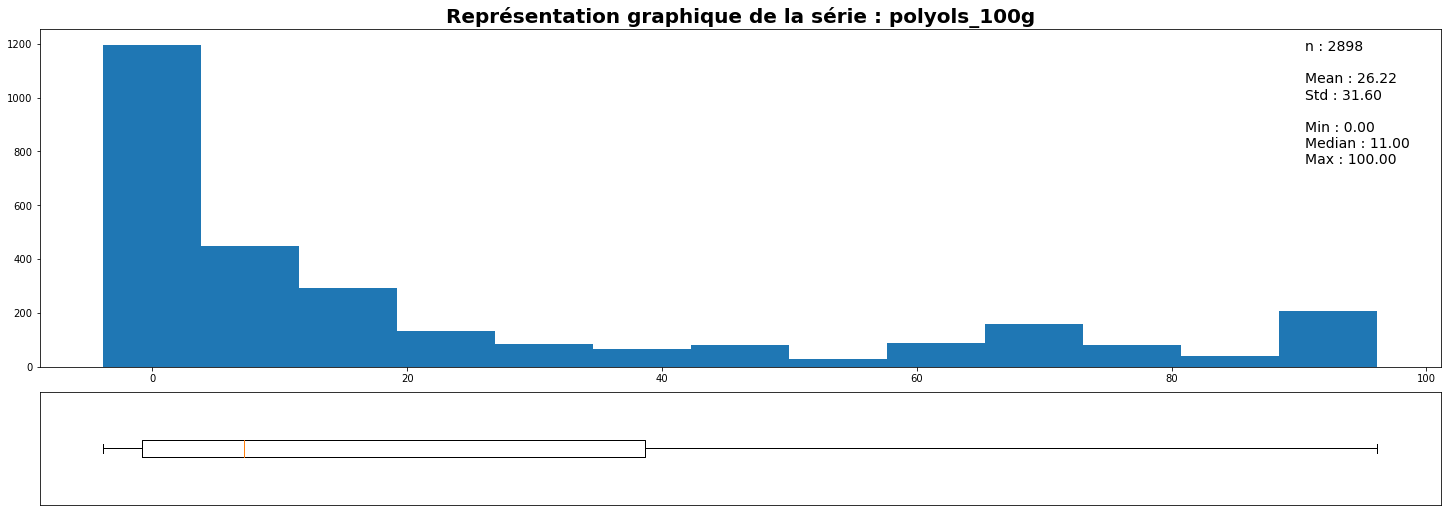

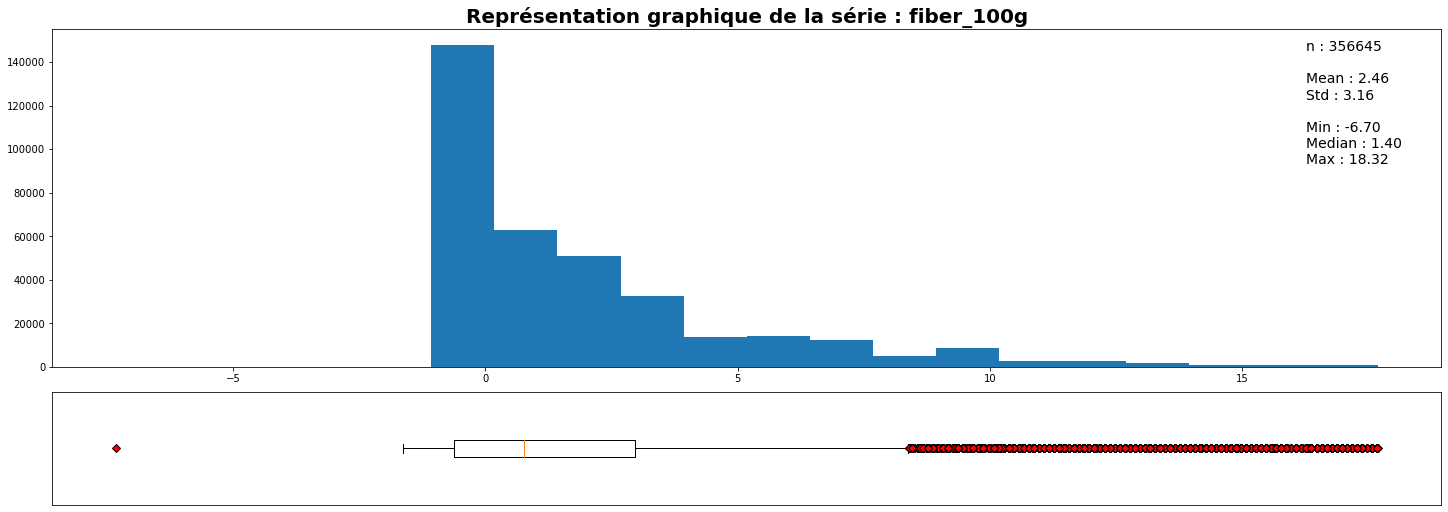

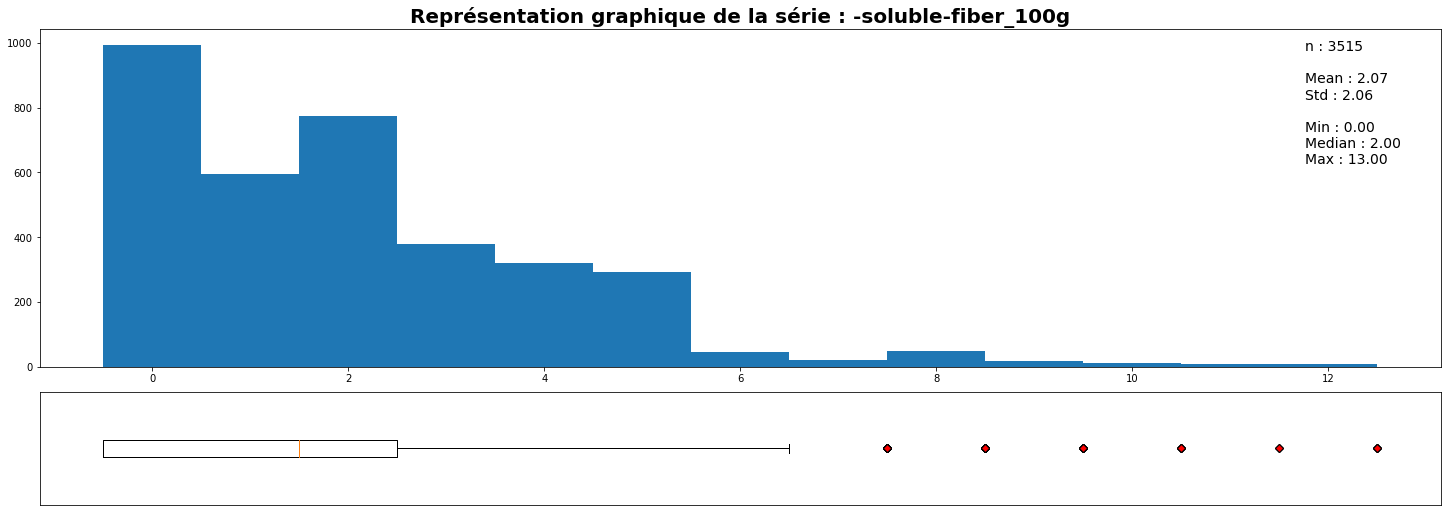

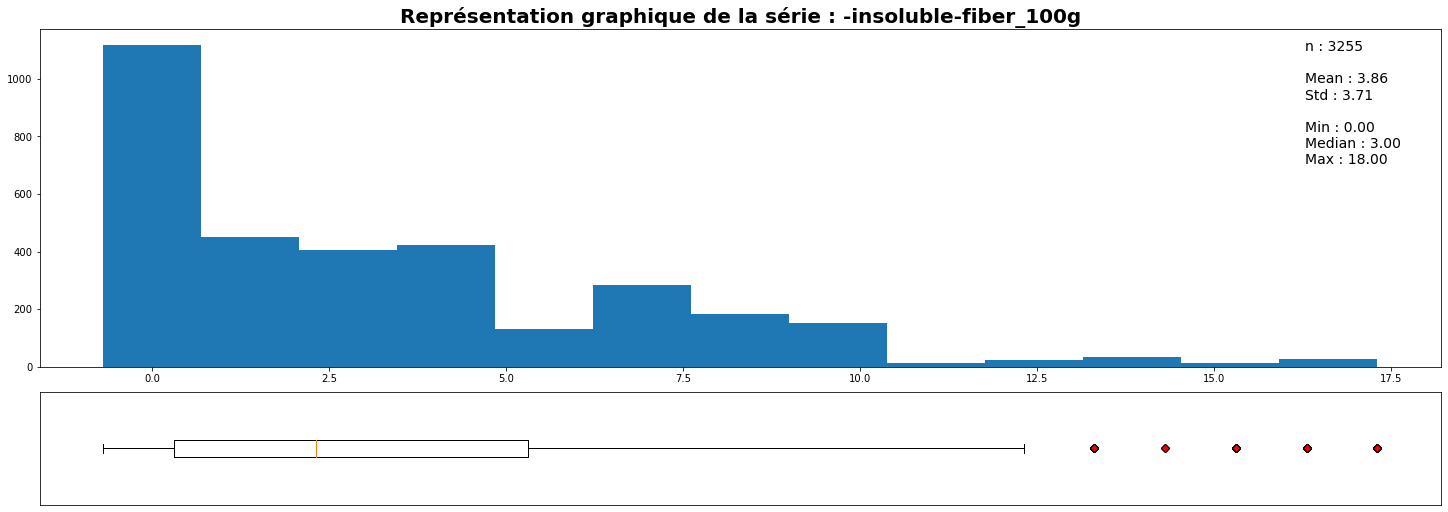

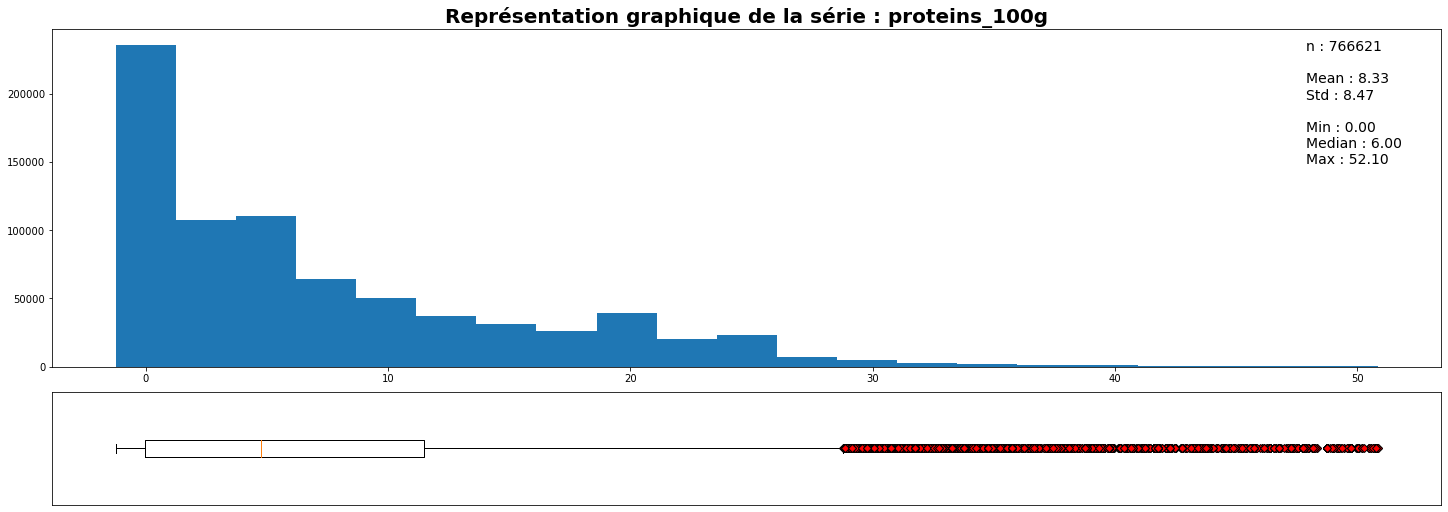

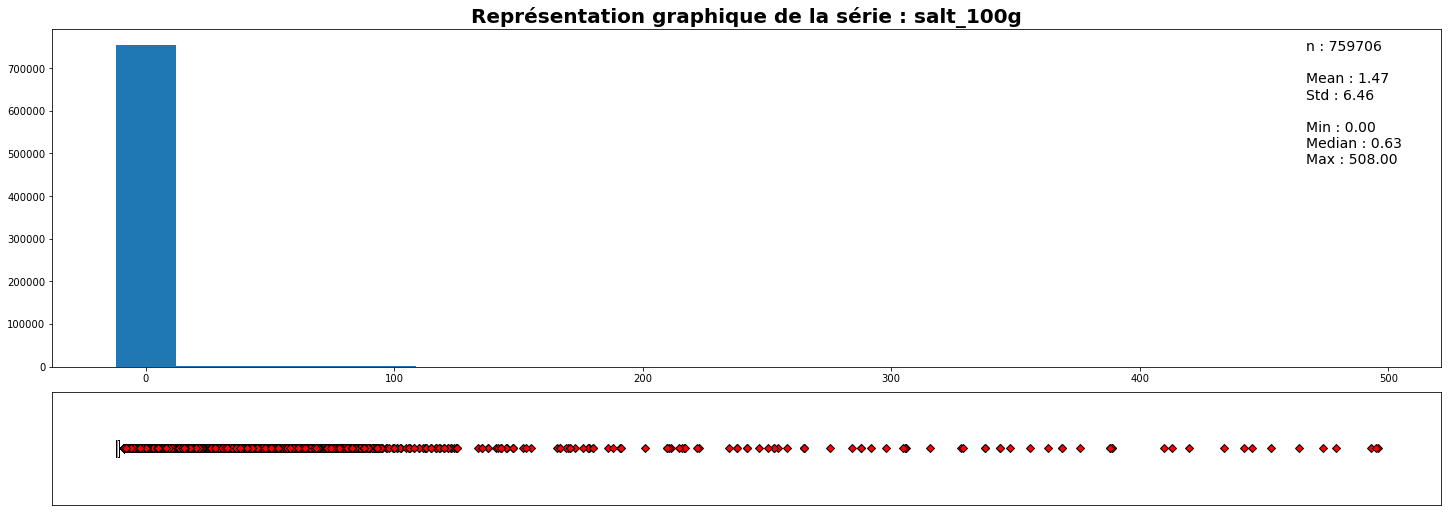

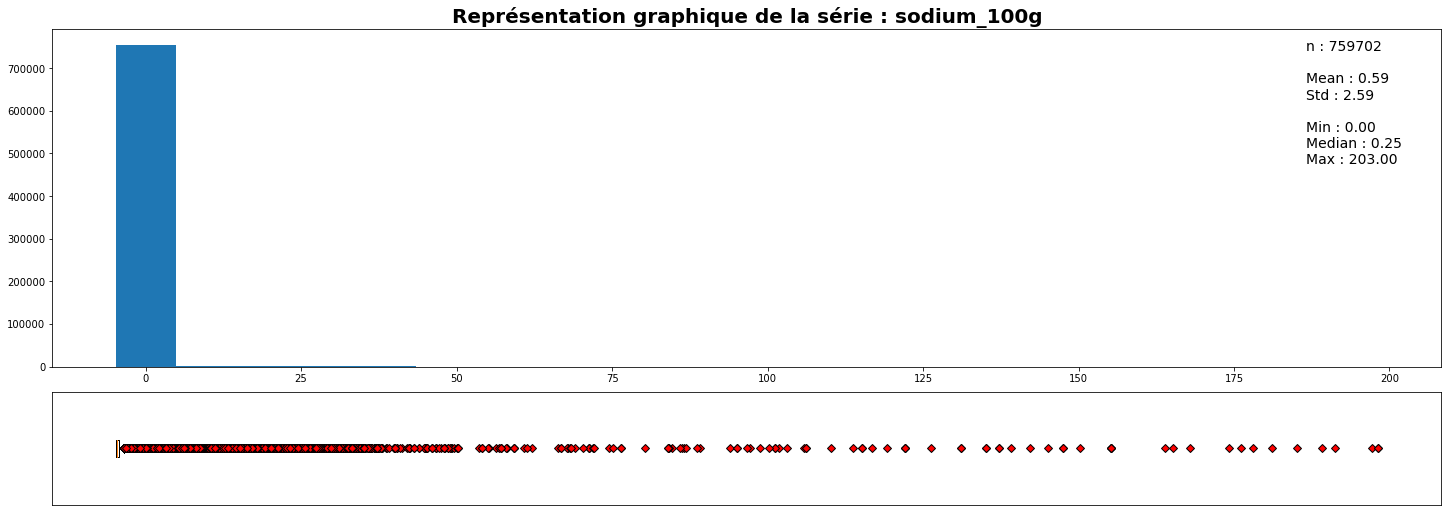

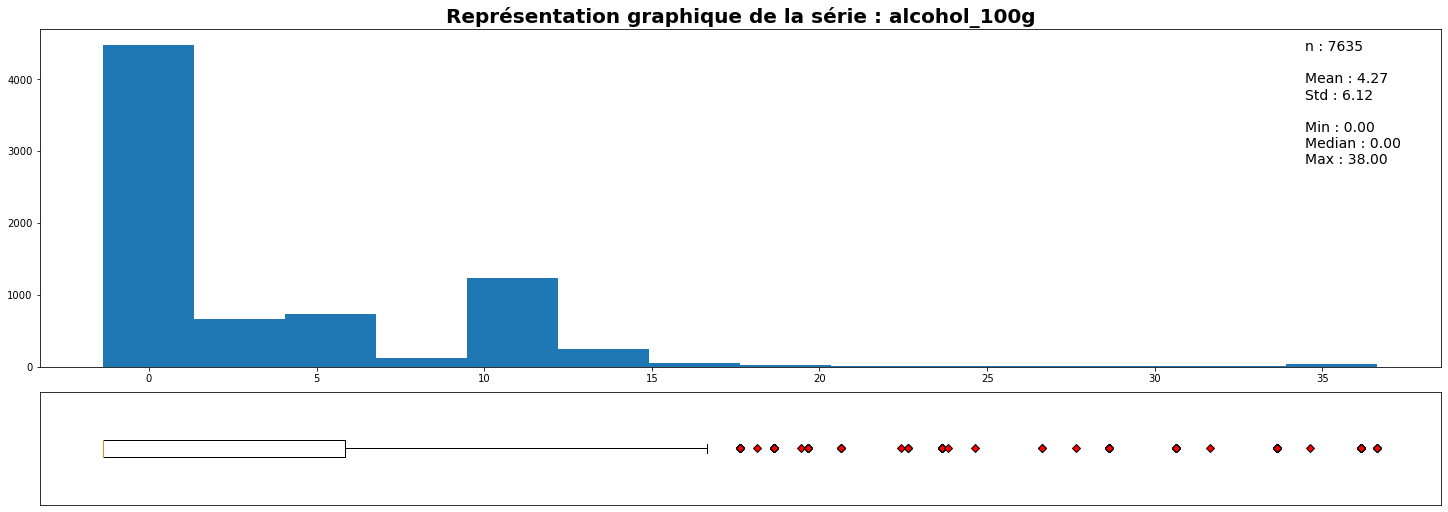

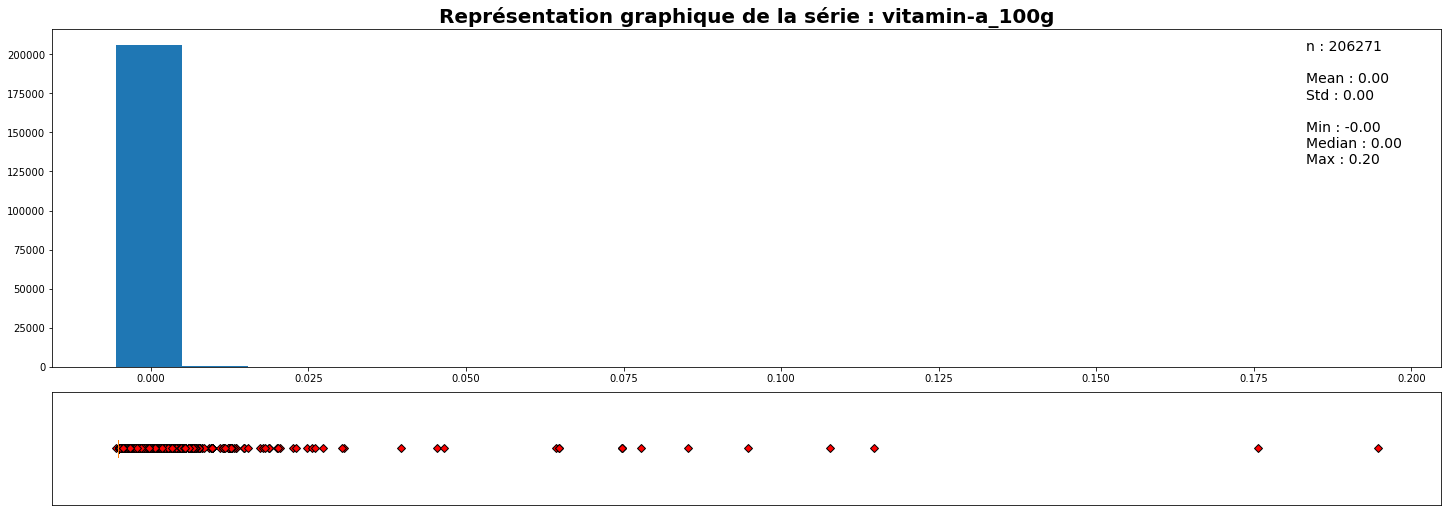

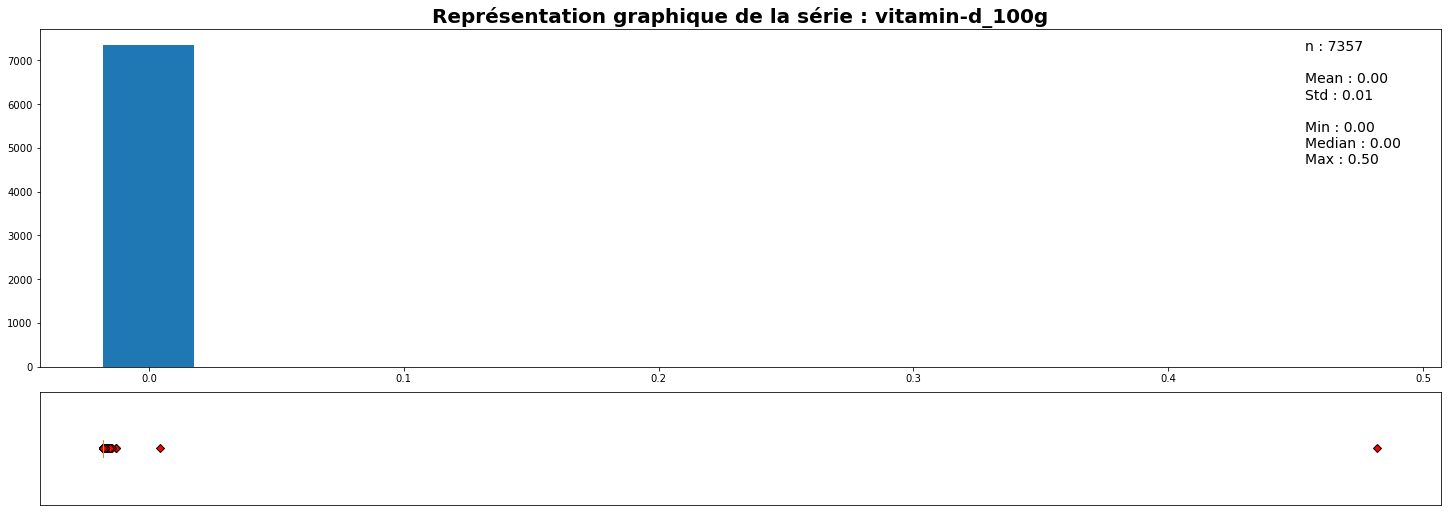

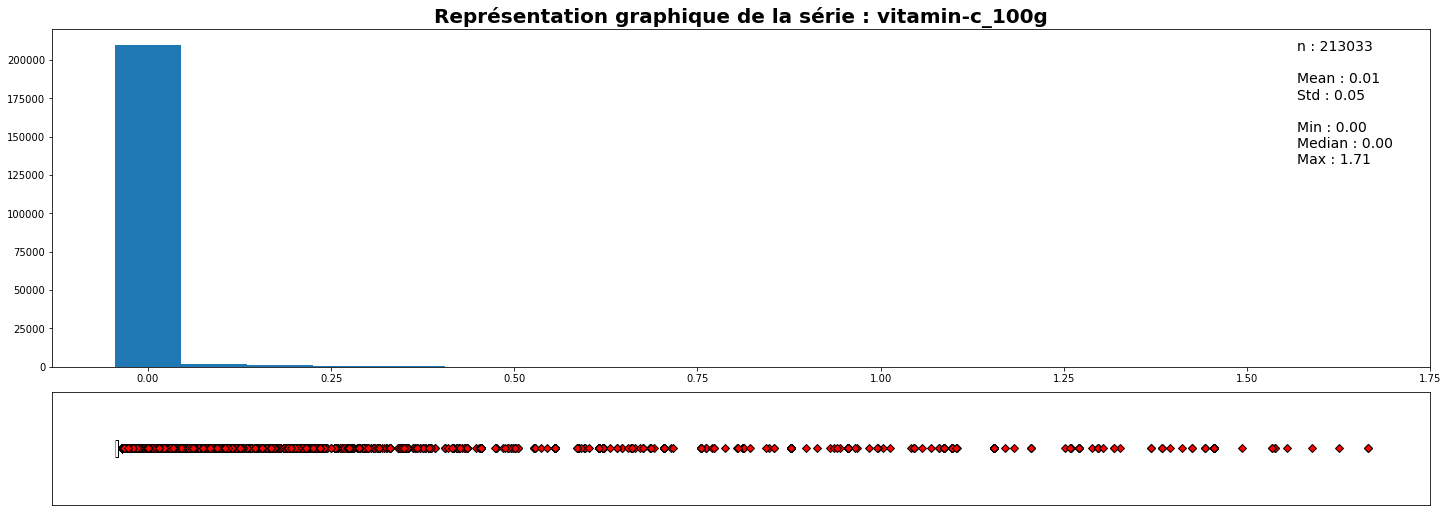

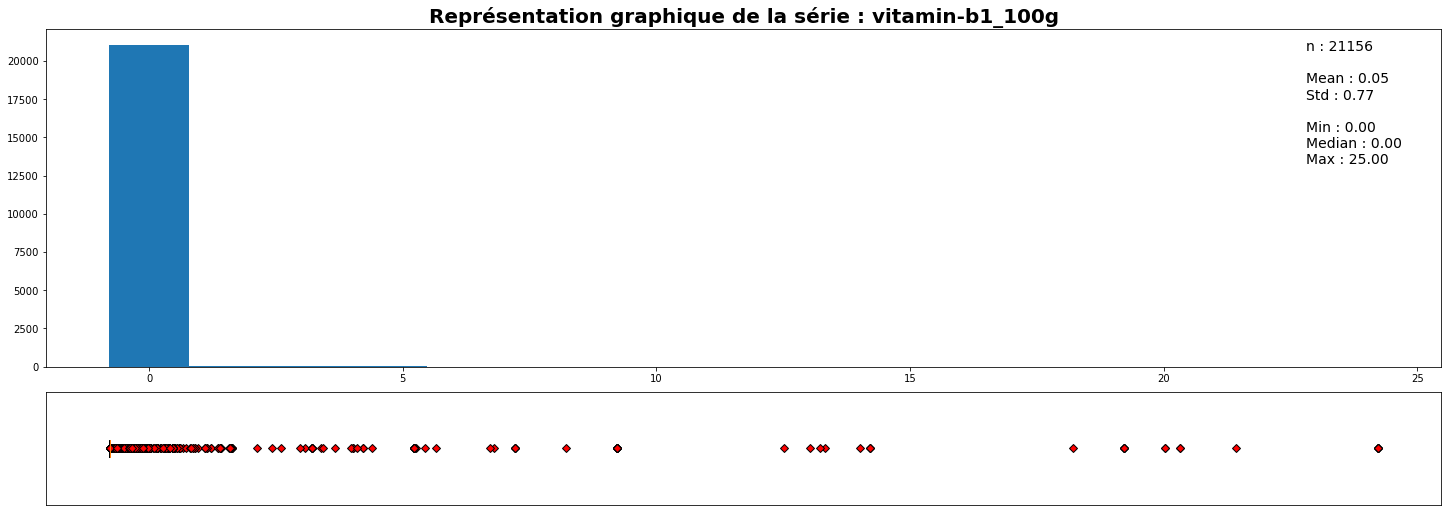

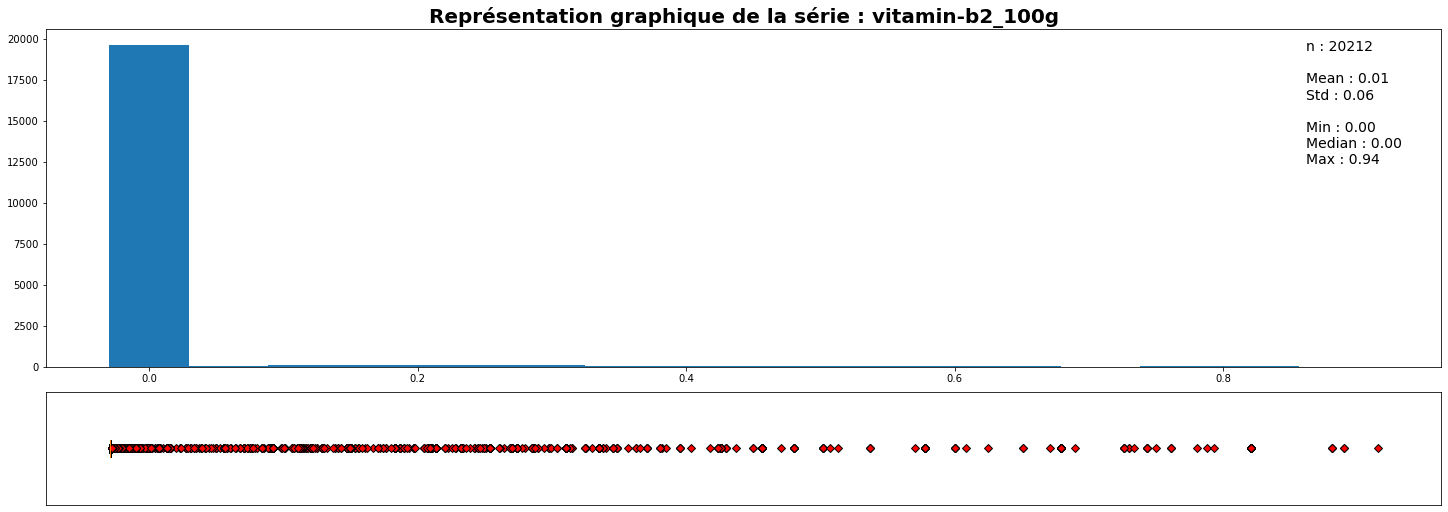

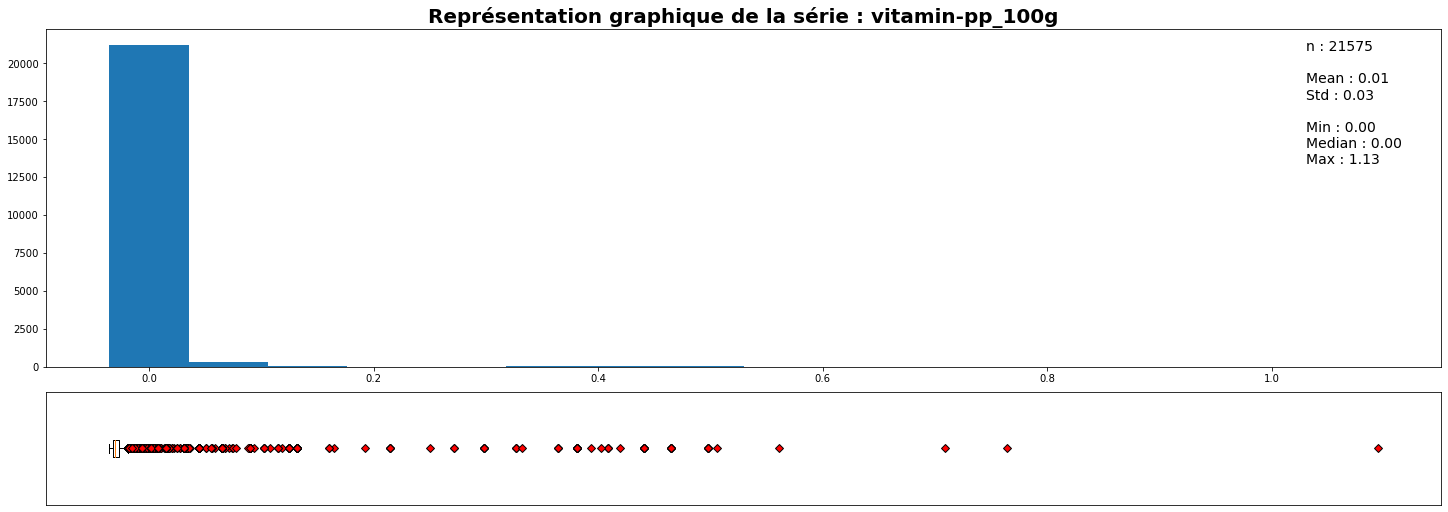

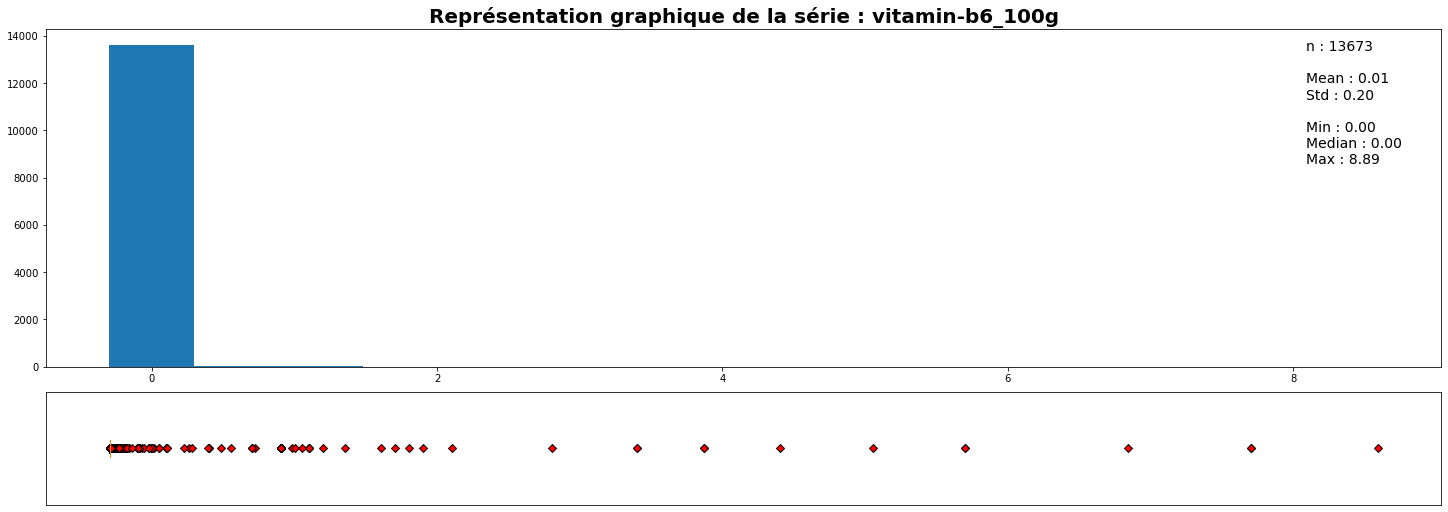

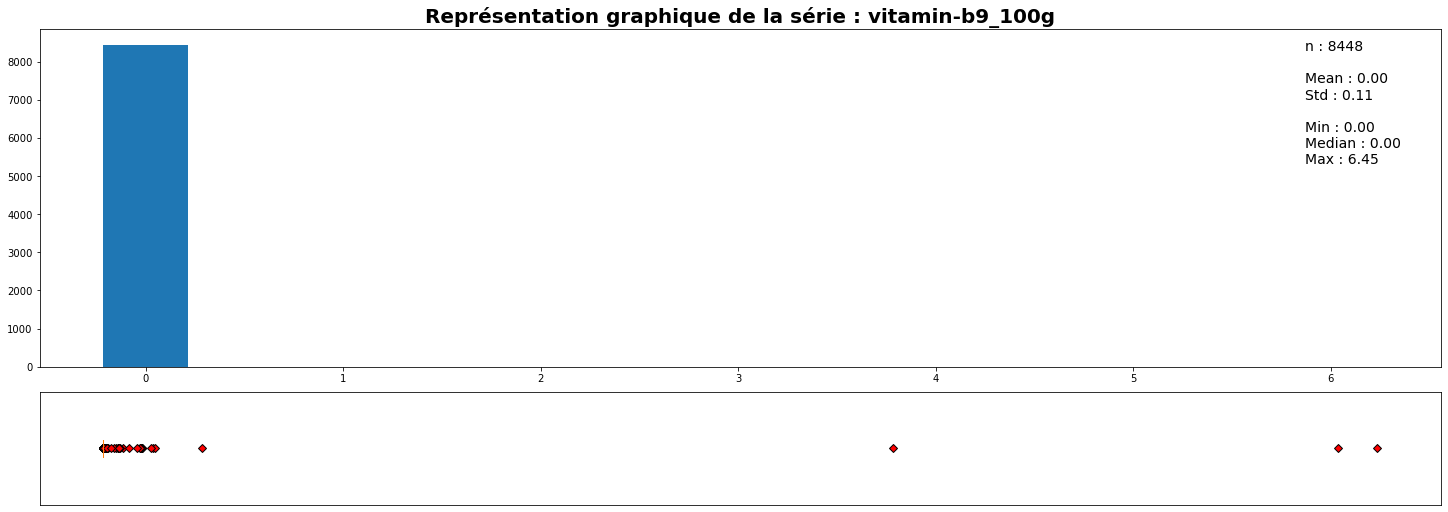

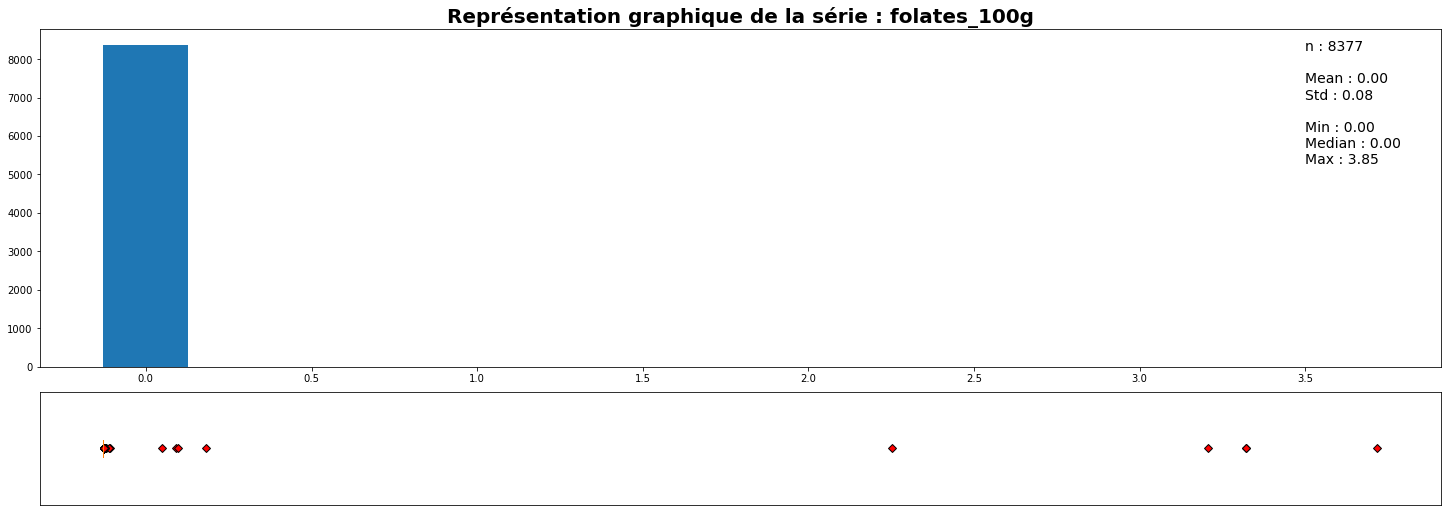

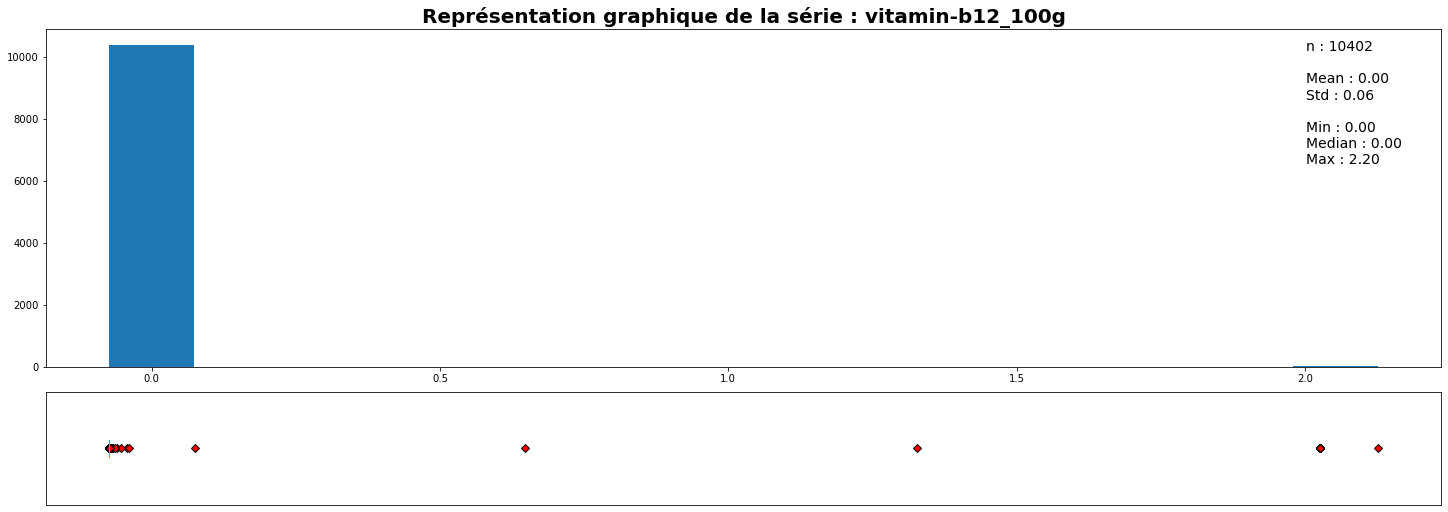

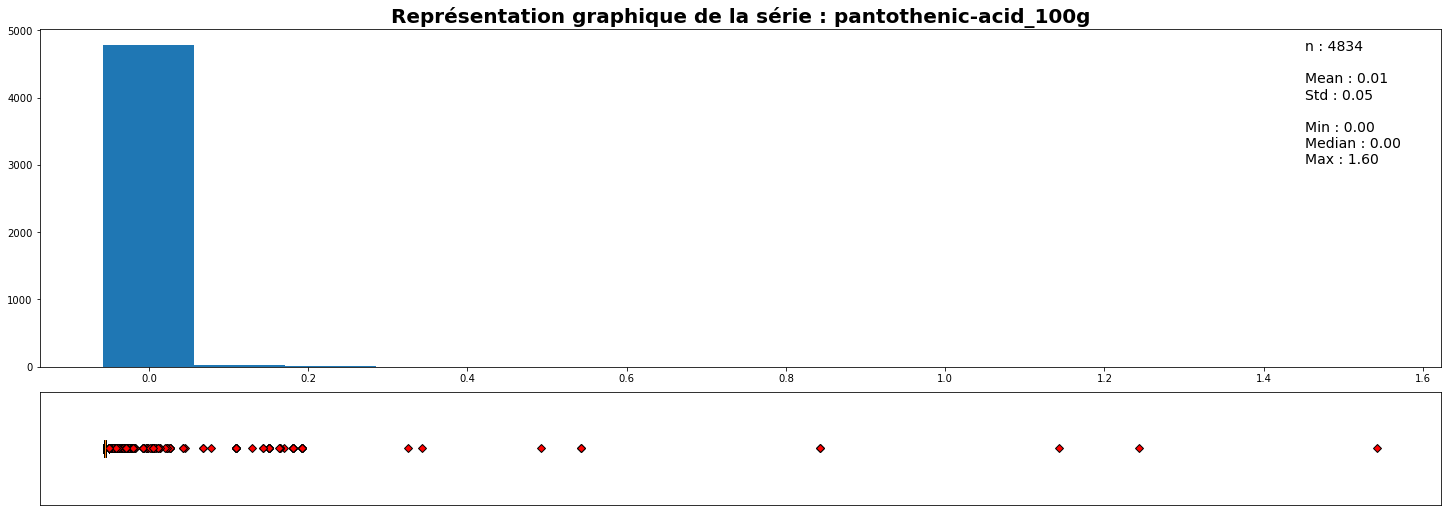

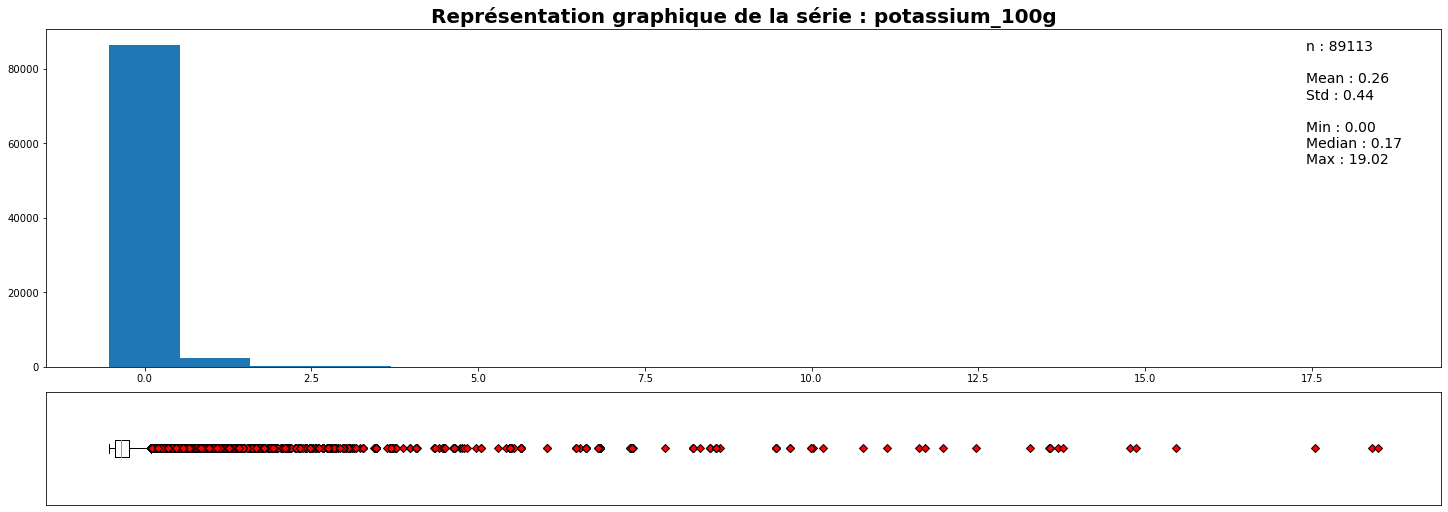

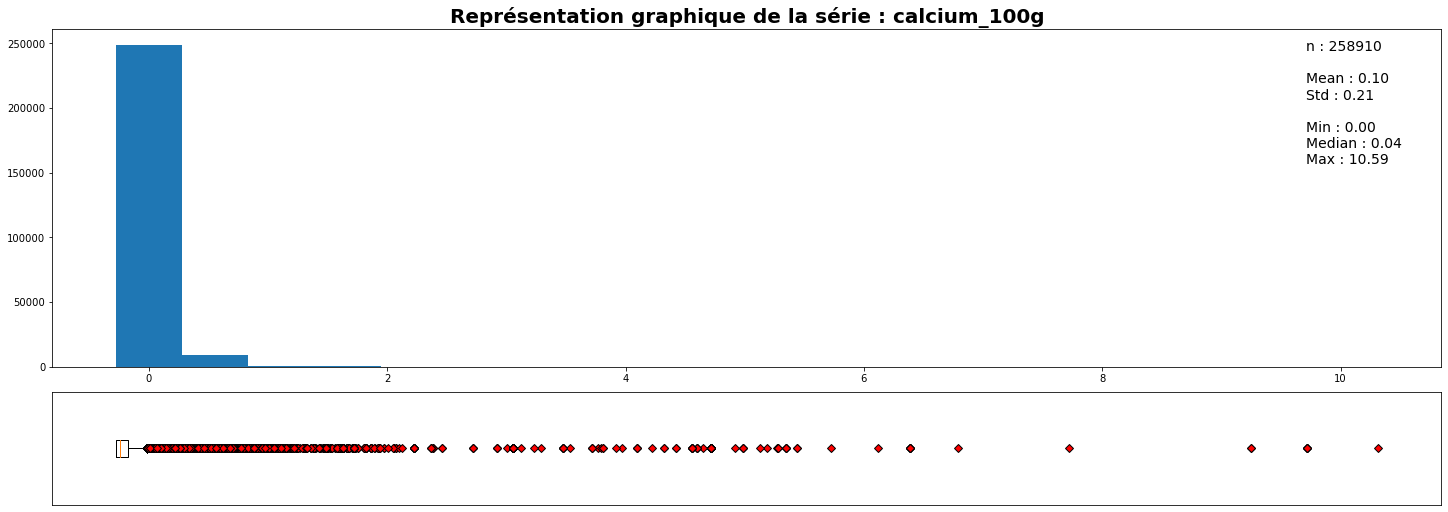

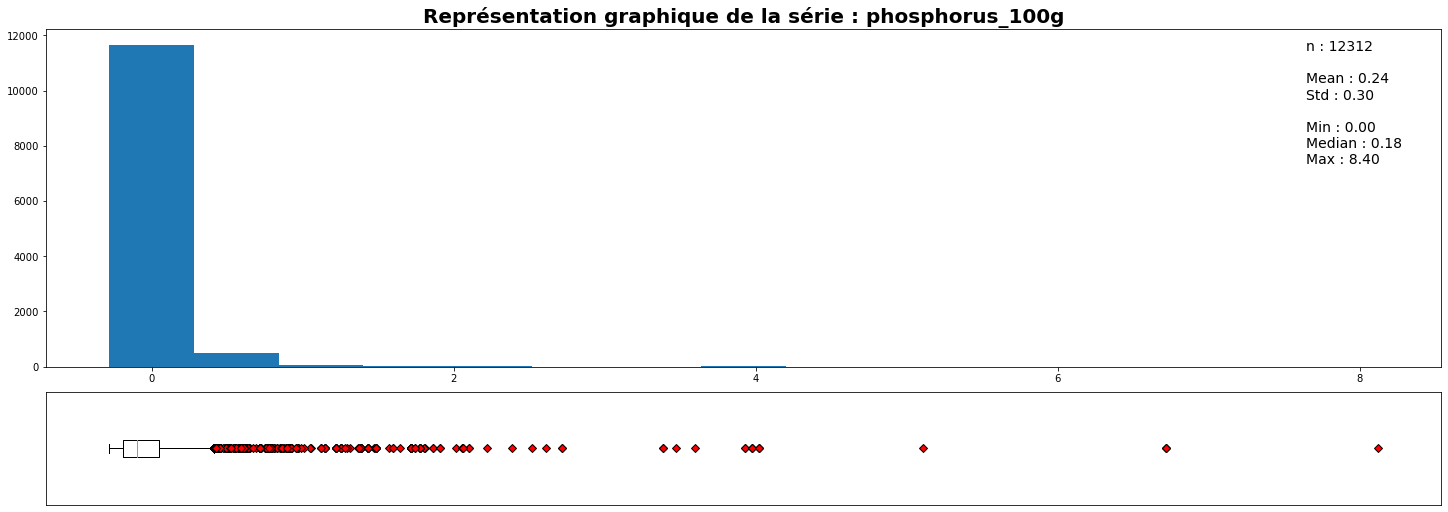

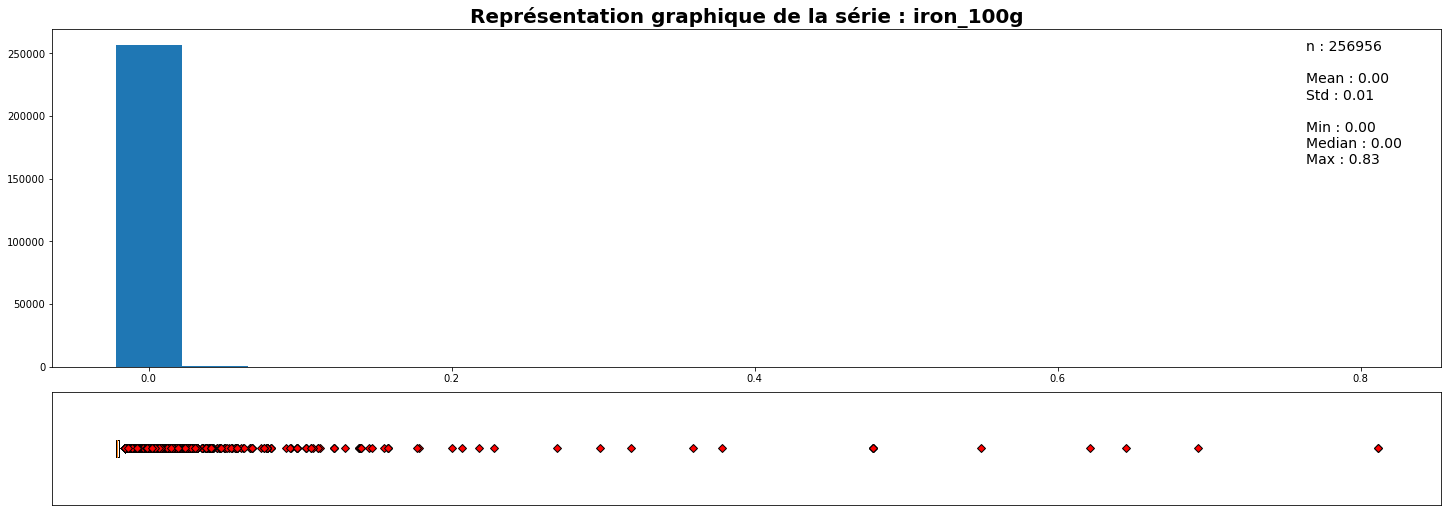

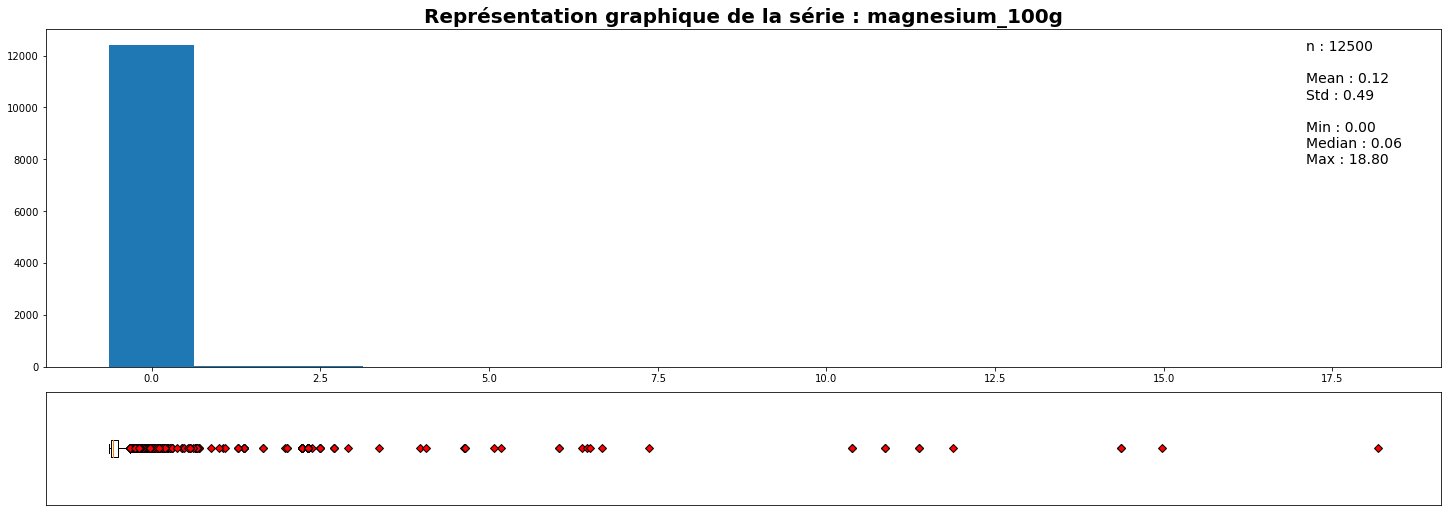

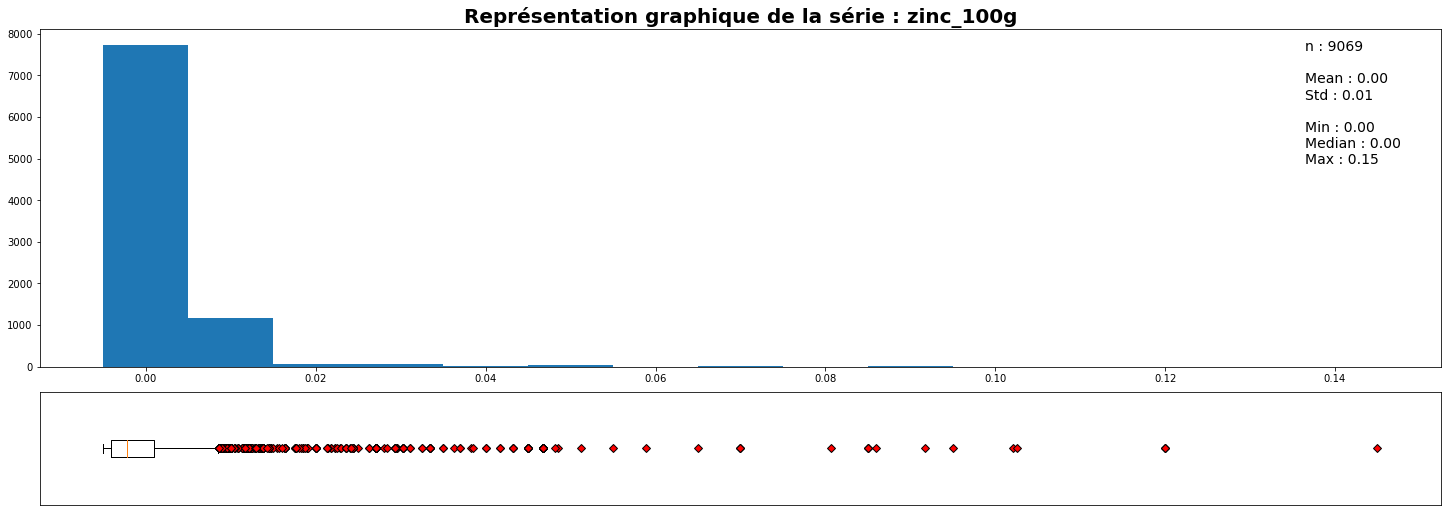

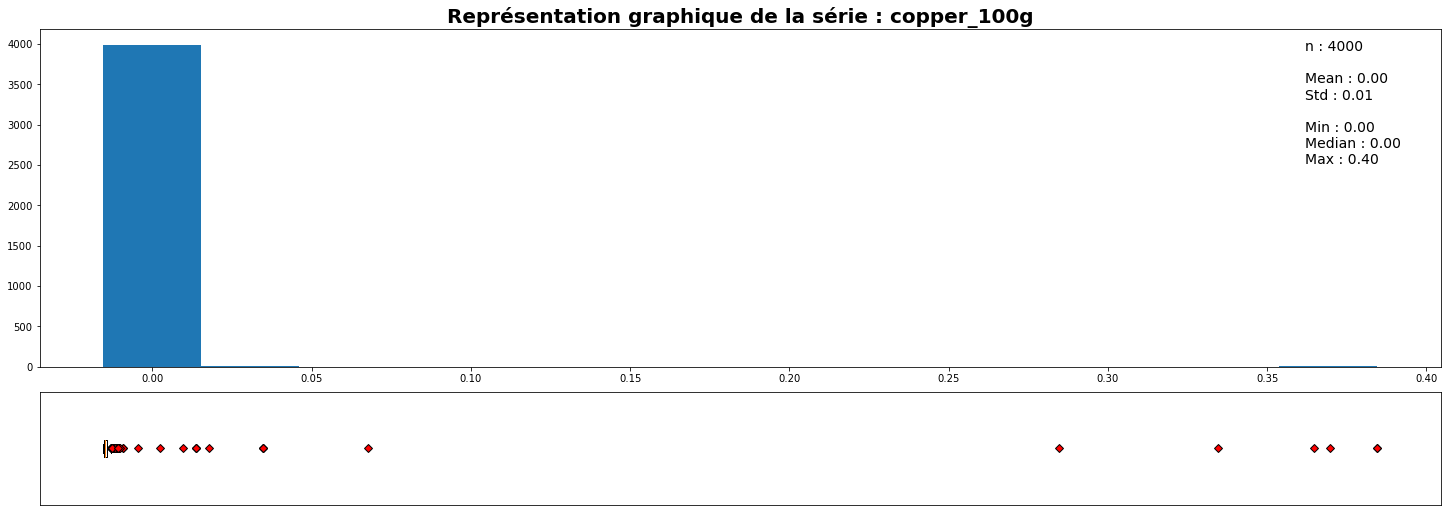

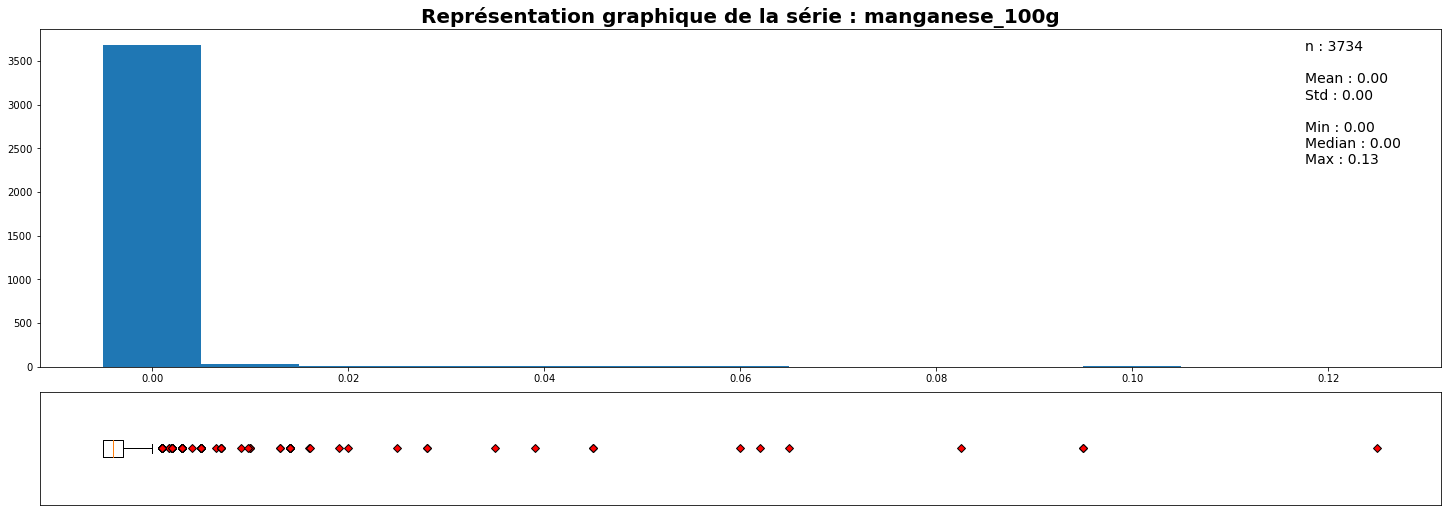

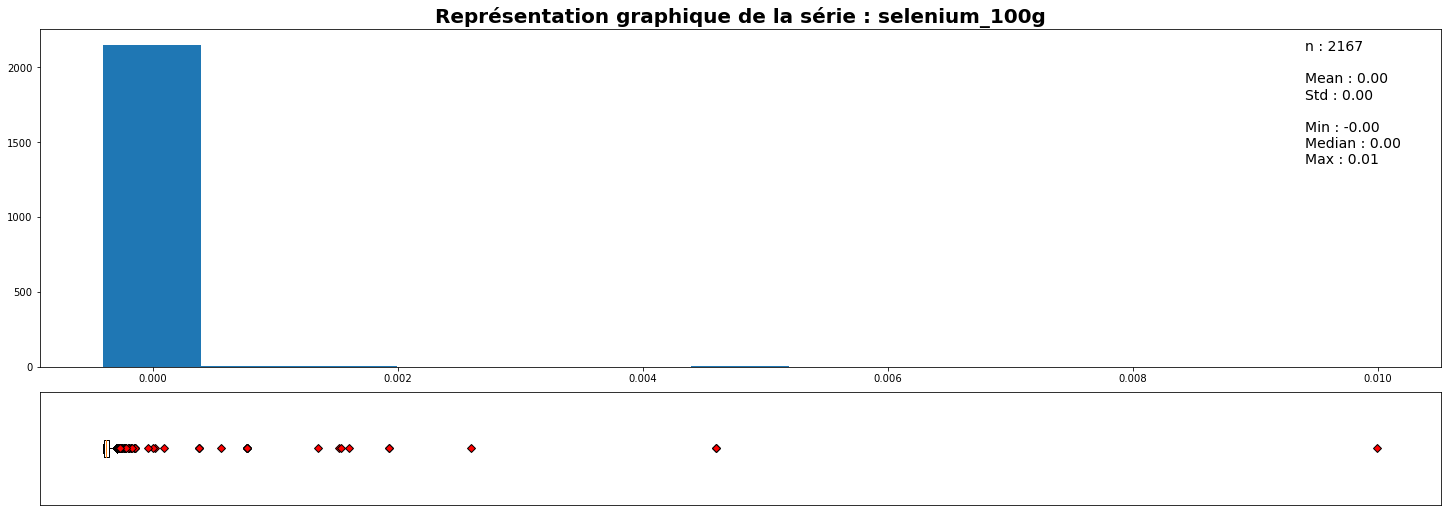

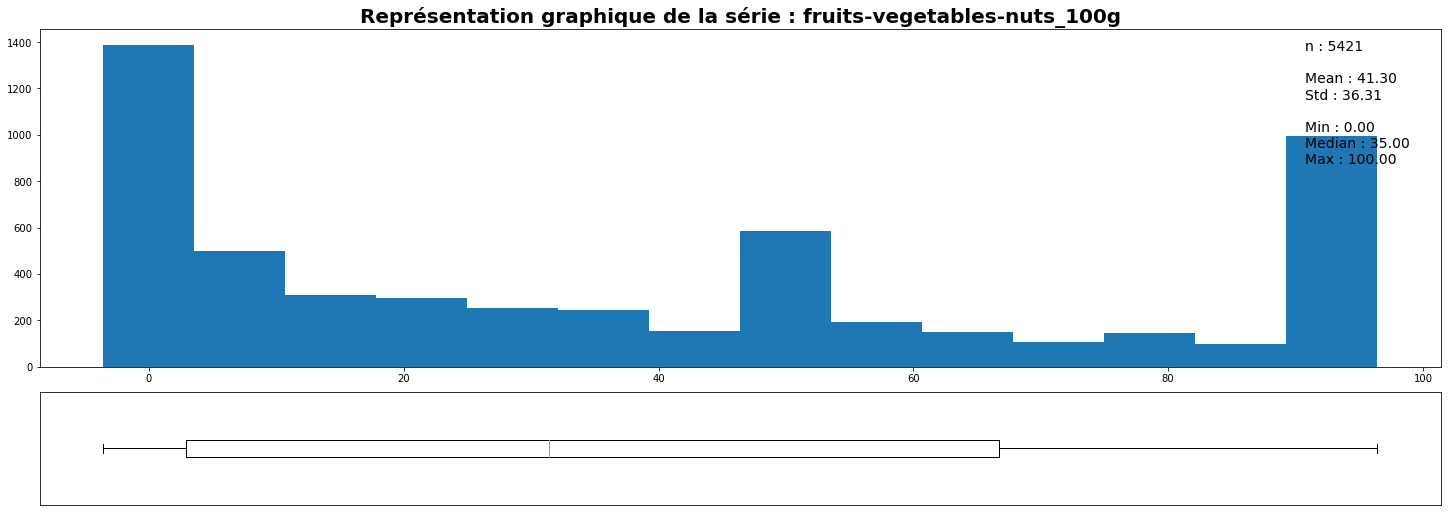

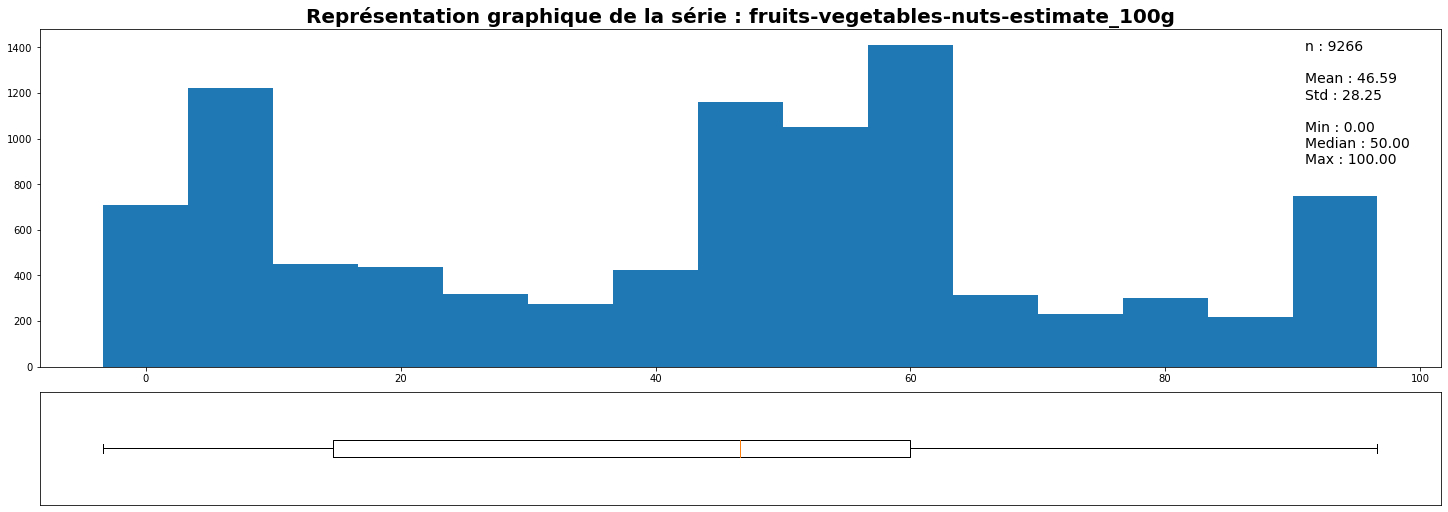

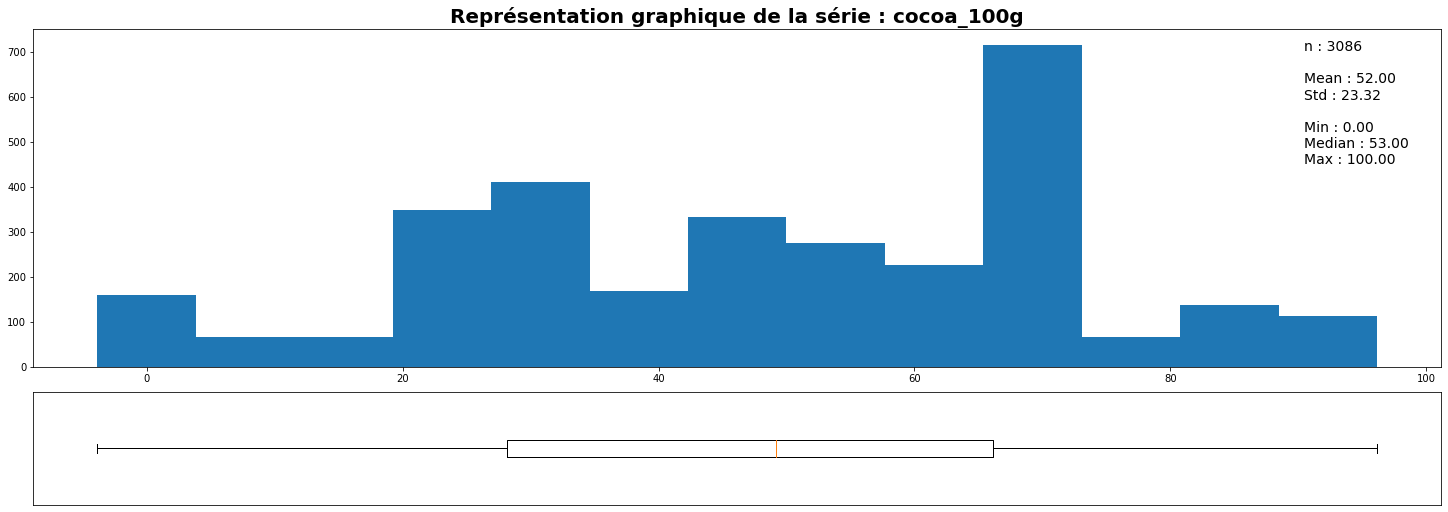

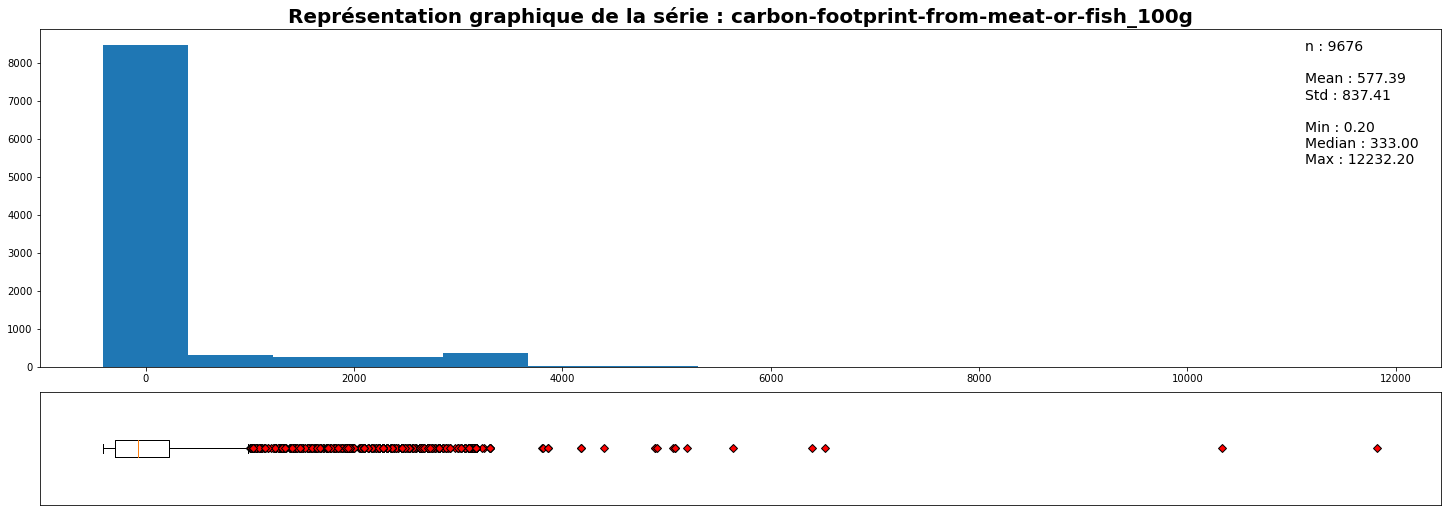

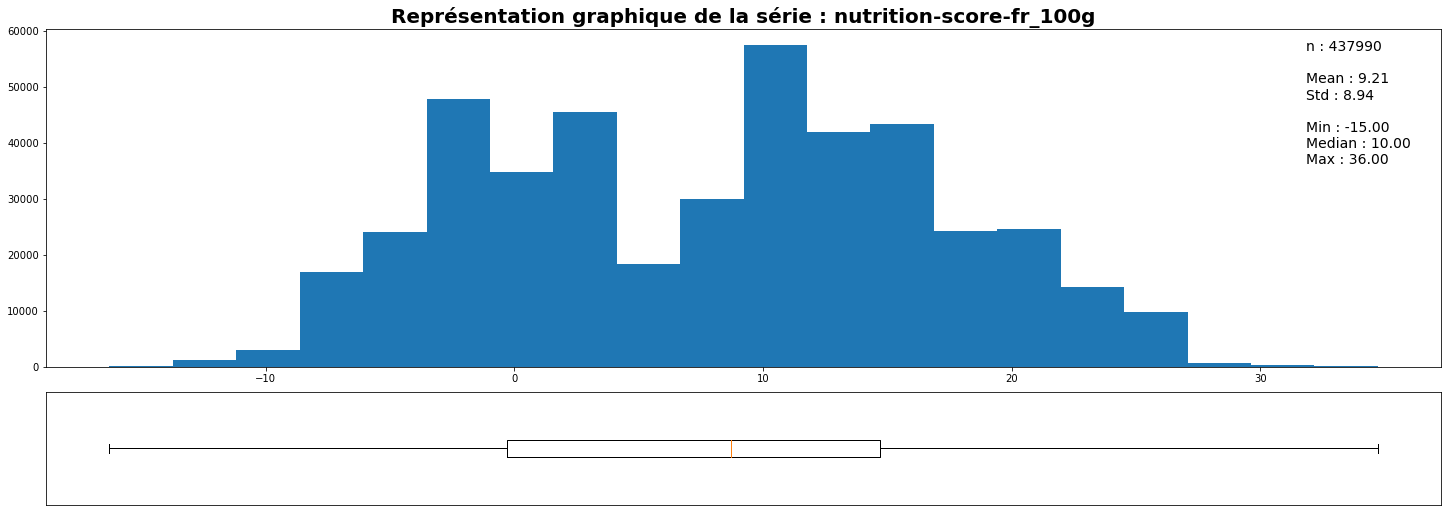

In [5]:
for i in df_cleaned:
    bar_column(df_cleaned[i])

In [16]:
# Traitement des outliers
list_energy = [0, 1, 2]

list_100g = []
for i in range(3, 41):
    list_100g.append(i)

list_vit = []
for i in range(19, 30):
    list_vit.append(i)

df_cleaned.iloc[:, list_energy] = df_cleaned.iloc[:, list_energy][df_cleaned.iloc[:, list_energy] < 3000]
df_cleaned.iloc[:, list_100g] = df_cleaned.iloc[:, list_100g][df_cleaned.iloc[:, list_100g] < 70]
df_cleaned.iloc[:, list_vit] = df_cleaned.iloc[:, list_vit][df_cleaned.iloc[:, list_vit] < 0.5]

df_cleaned = df_cleaned[df_cleaned > 0]
df_cleaned['carbon-footprint-from-meat-or-fish_100g'] = df_cleaned['carbon-footprint-from-meat-or-fish_100g']\
[df_cleaned['carbon-footprint-from-meat-or-fish_100g'] < 4000]
df_cleaned['salt_100g'] = df_cleaned['salt_100g'][df_cleaned['salt_100g'] < 5]

df_cleaned = df_cleaned.drop_duplicates()

In [17]:
list_healthe = [2, 3, 10, 12, 16, 43, 42]
df_healthe = df_cleaned.iloc[:, list_healthe].dropna(thresh=6)

In [18]:
presentation(df_healthe)

,energy_100g,fat_100g,sugars_100g,fiber_100g,salt_100g,nutrition-score-fr_100g,carbon-footprint-from-meat-or-fish_100g
323,455.0,4.200000,1.4,1.8,0.6,2.0,NaN
345,1952.4,15.300000,69.8,0.1,0.5,2.0,NaN
383,2318.0,53.200001,0.5,1.3,2.7,24.0,NaN


Pourcentage de NA dans le jeu de données : 13.96 %
df.shape : (99135, 7)


In [19]:
values = {'energy_100g': df_healthe['energy_100g'].mean(),
    'fat_100g': df_healthe['fat_100g'].mean(),
    'sugars_100g': df_healthe['sugars_100g'].mean(),
    'fiber_100g': df_healthe['fiber_100g'].mean(),
    'salt_100g': df_healthe['salt_100g'].mean(),
    'nutrition-score-fr_100g': df_healthe['nutrition-score-fr_100g'].mean(),
         }
df_healthe = df_healthe.fillna(value=values)

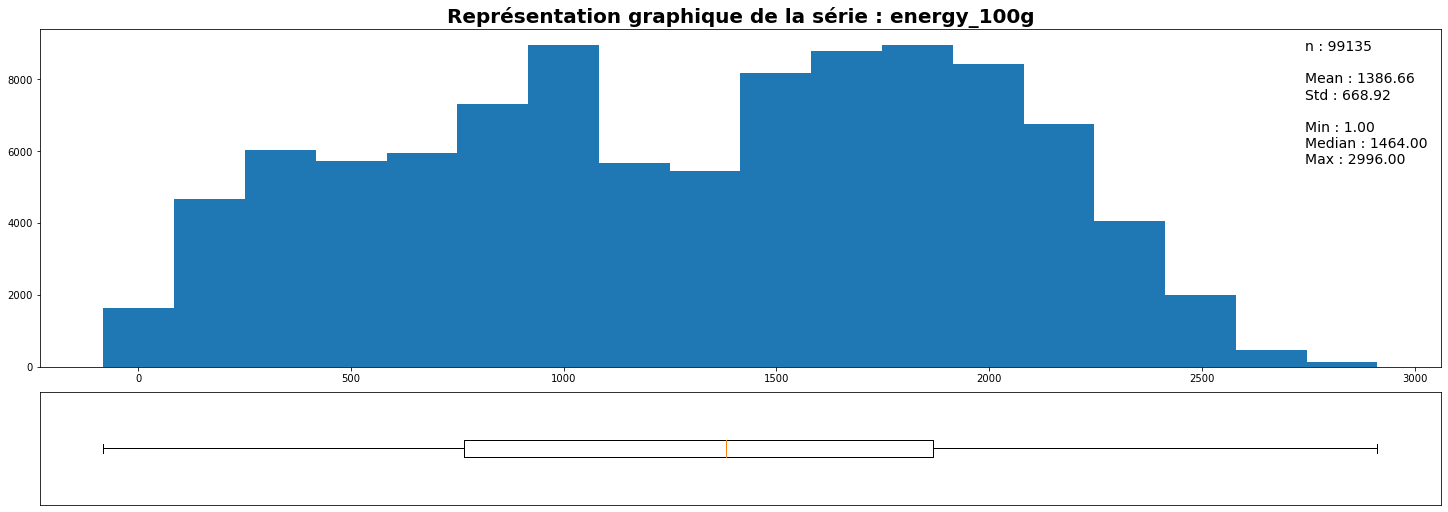

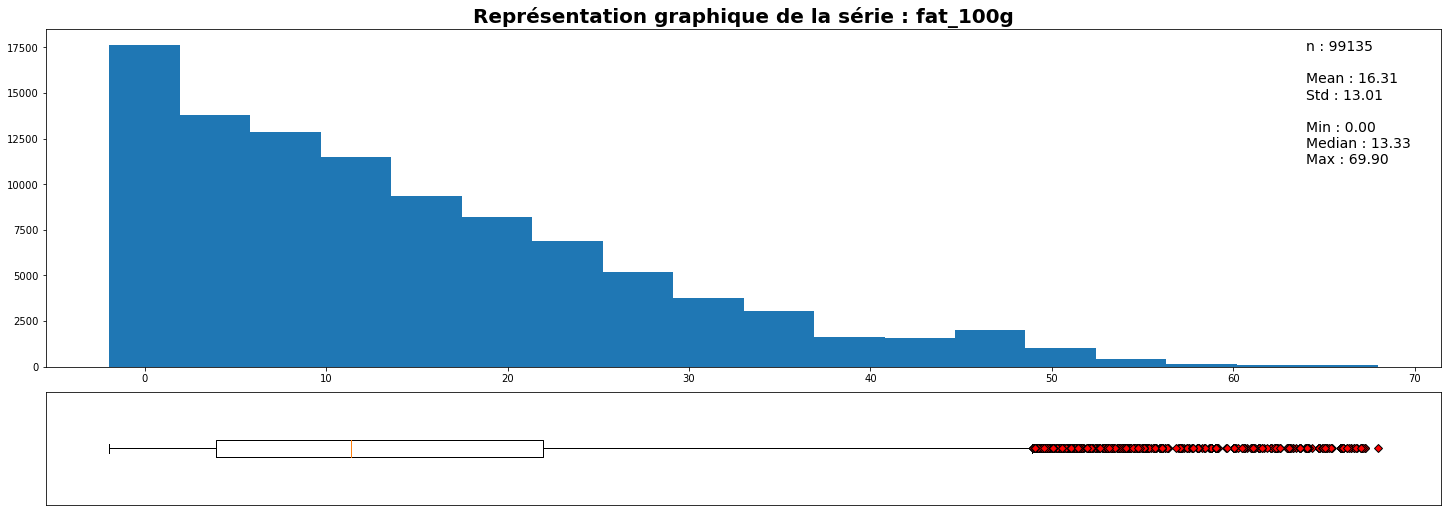

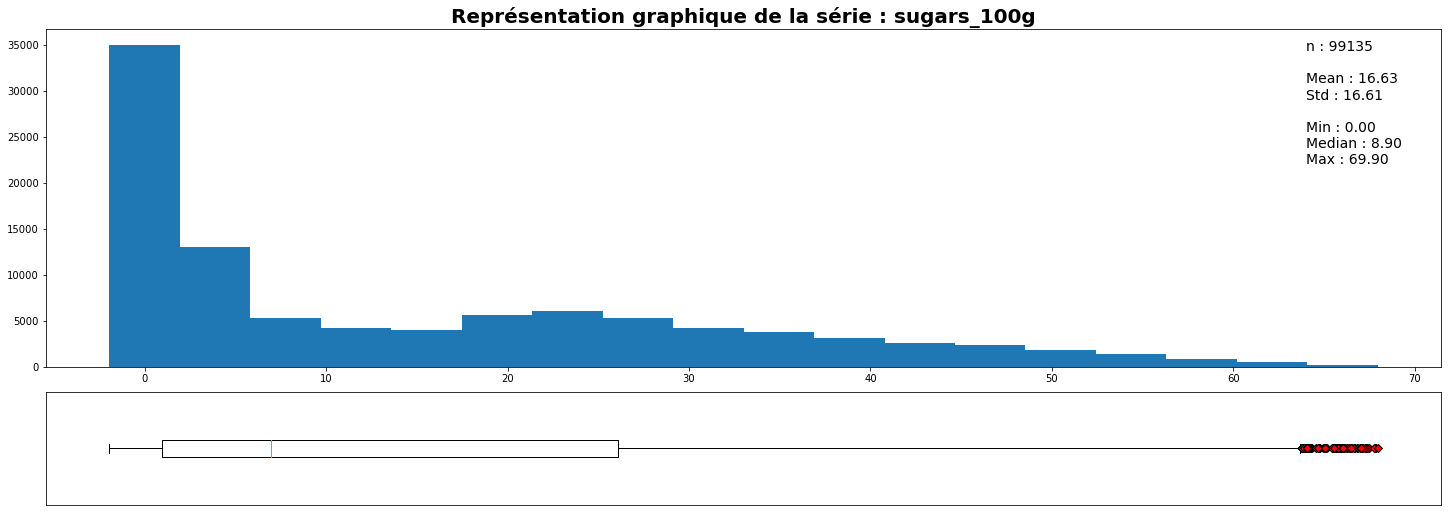

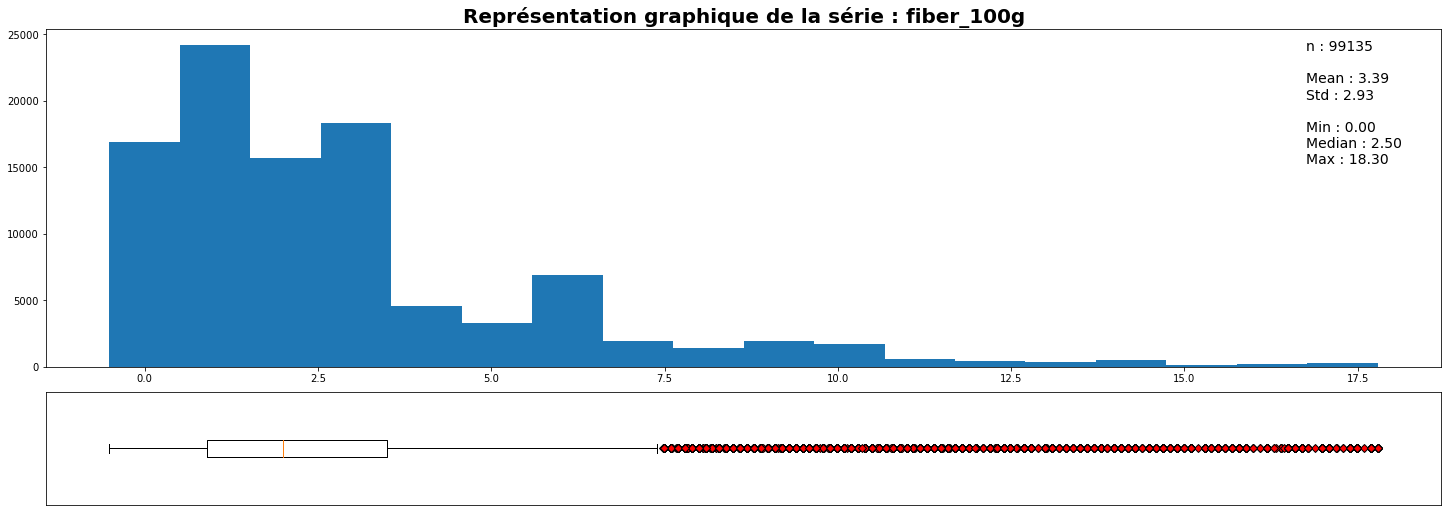

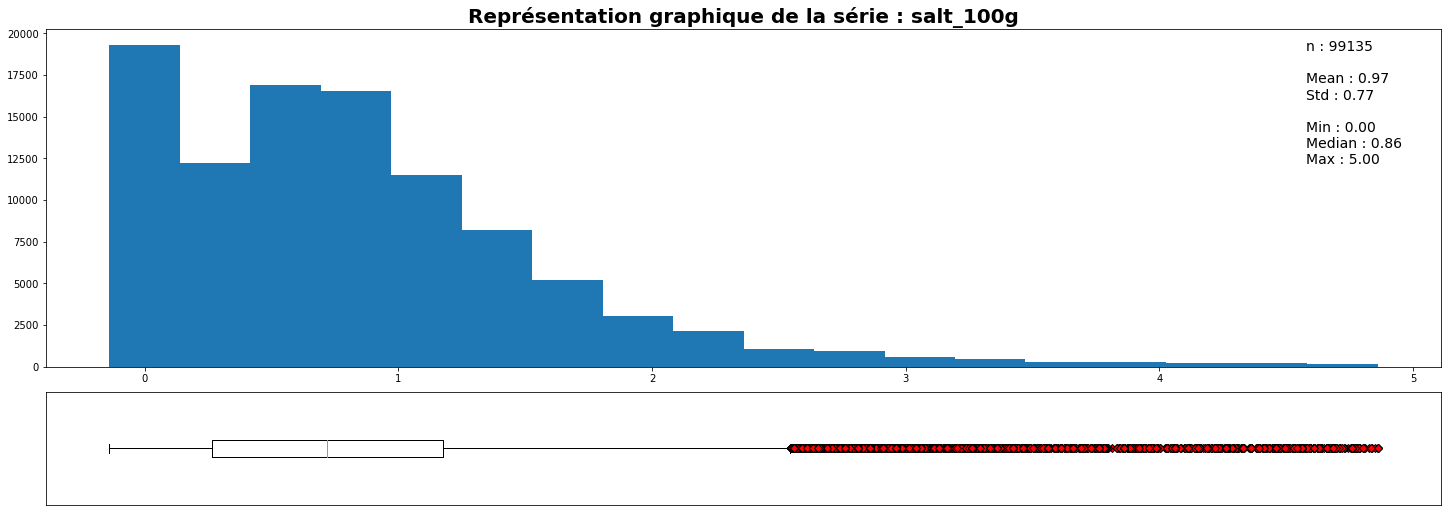

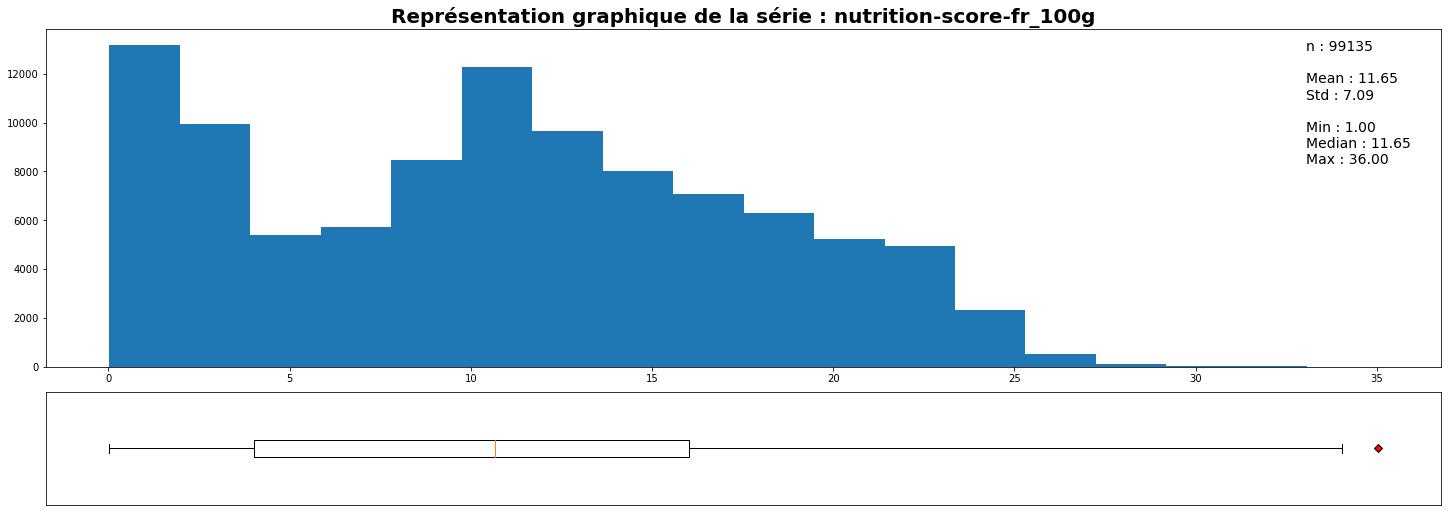

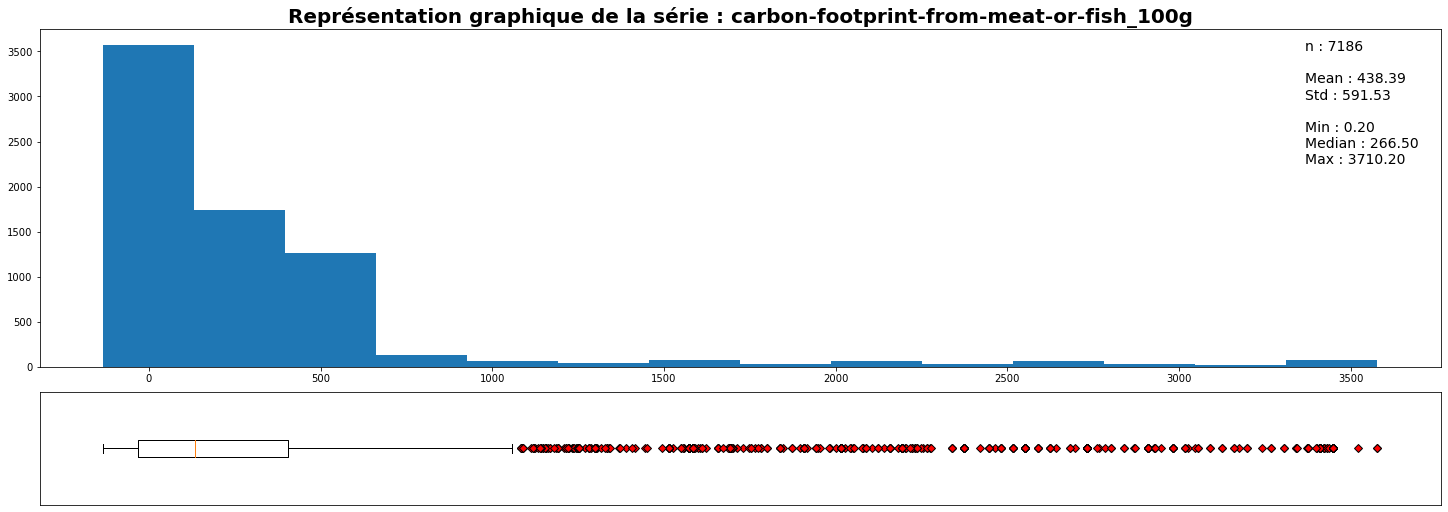

In [20]:
for i in df_healthe:
    bar_column(df_healthe[i])

### Phase II : Analyse des données

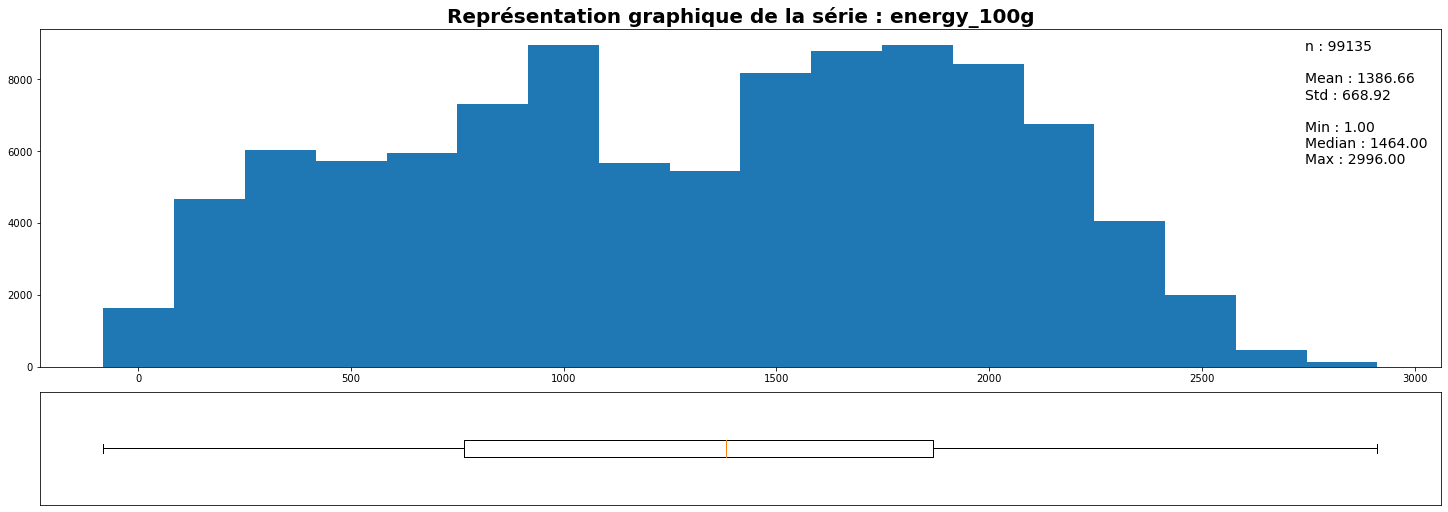

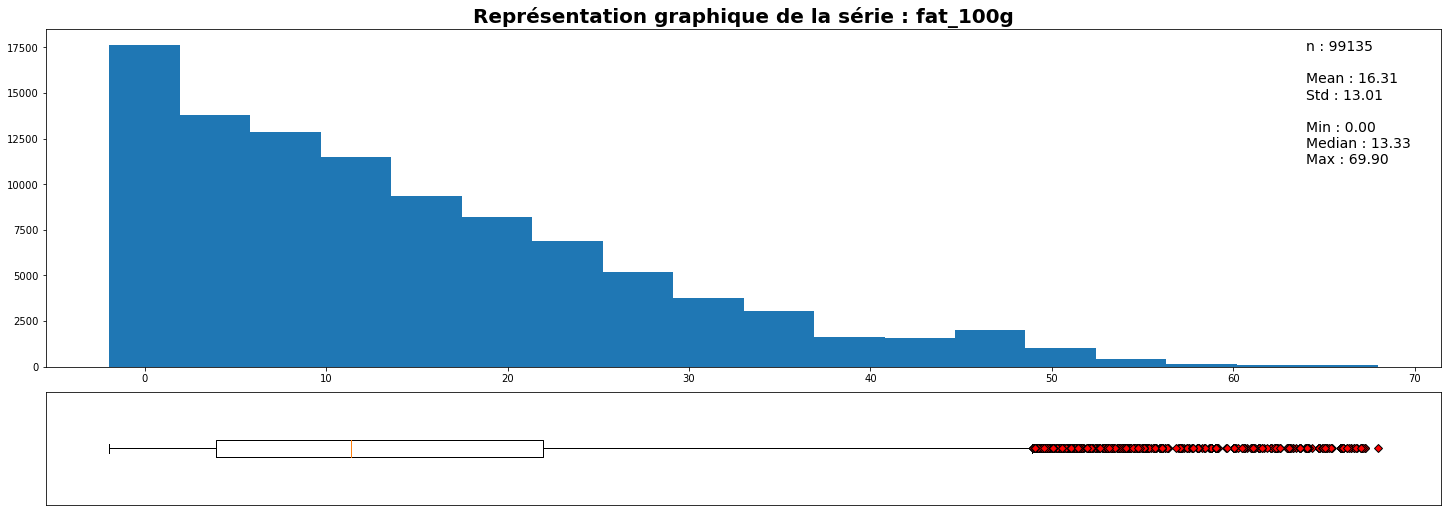

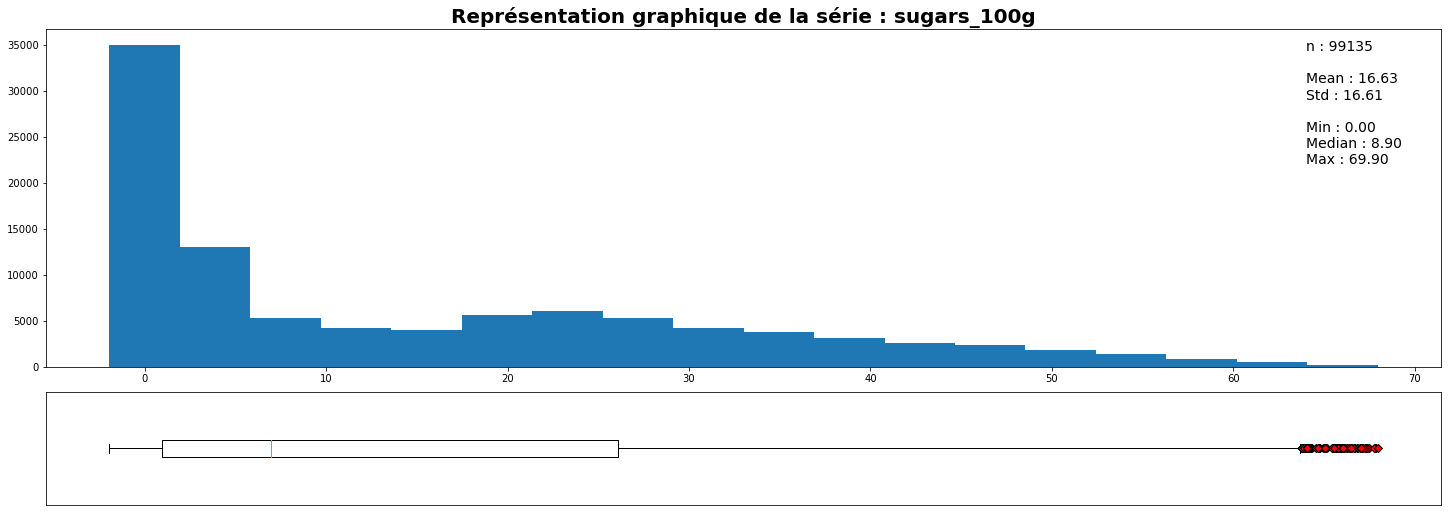

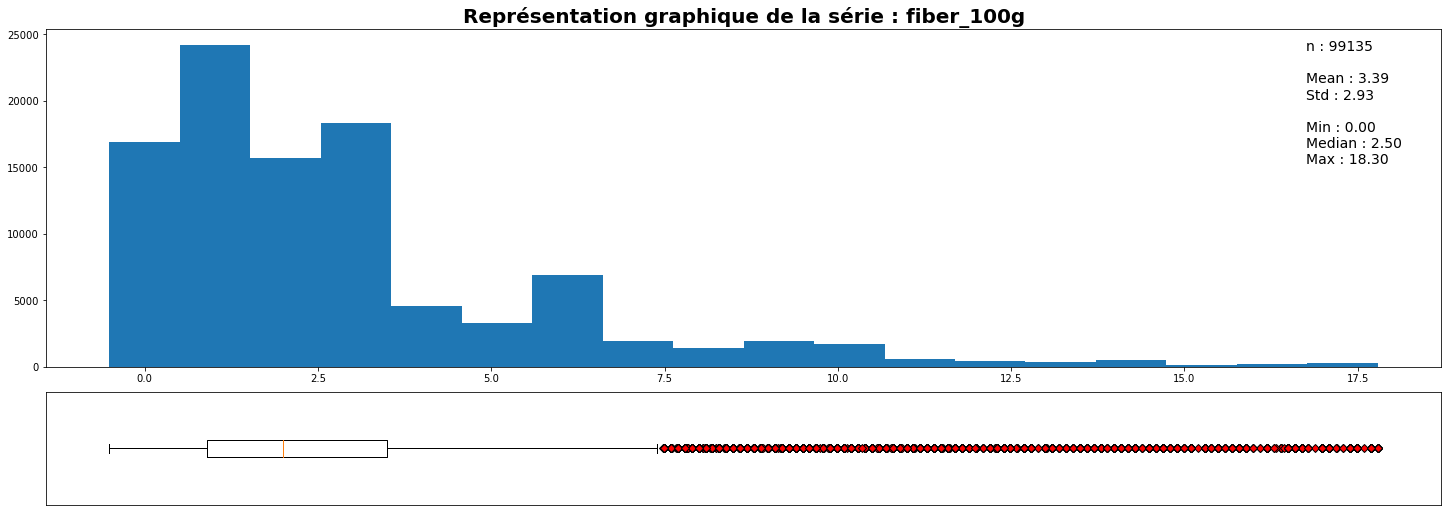

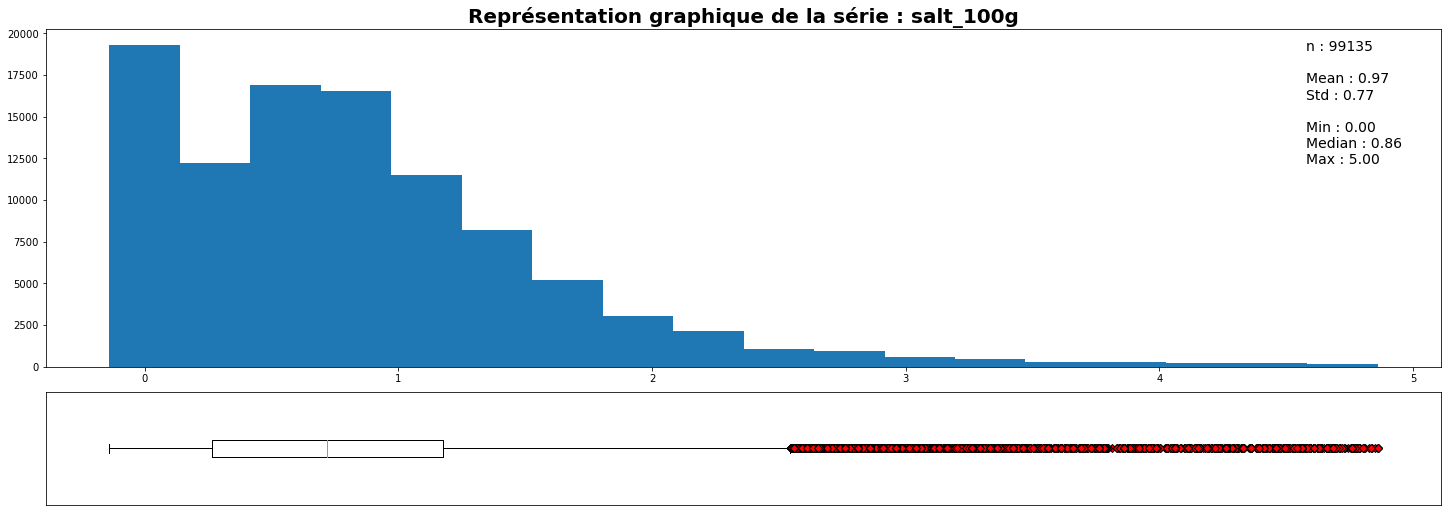

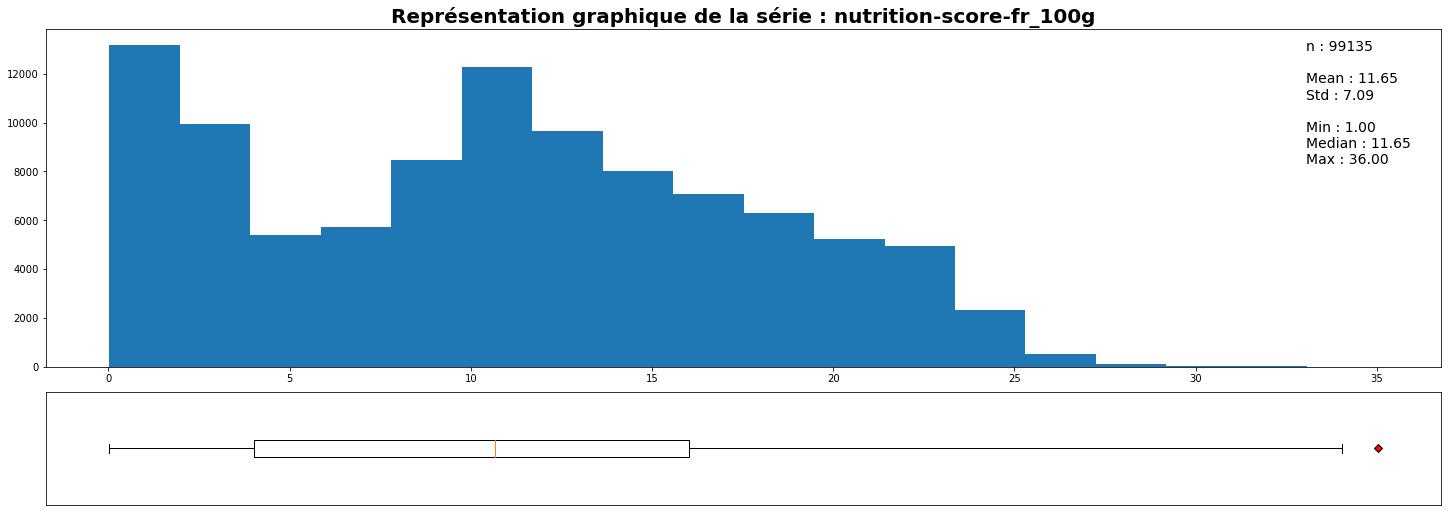

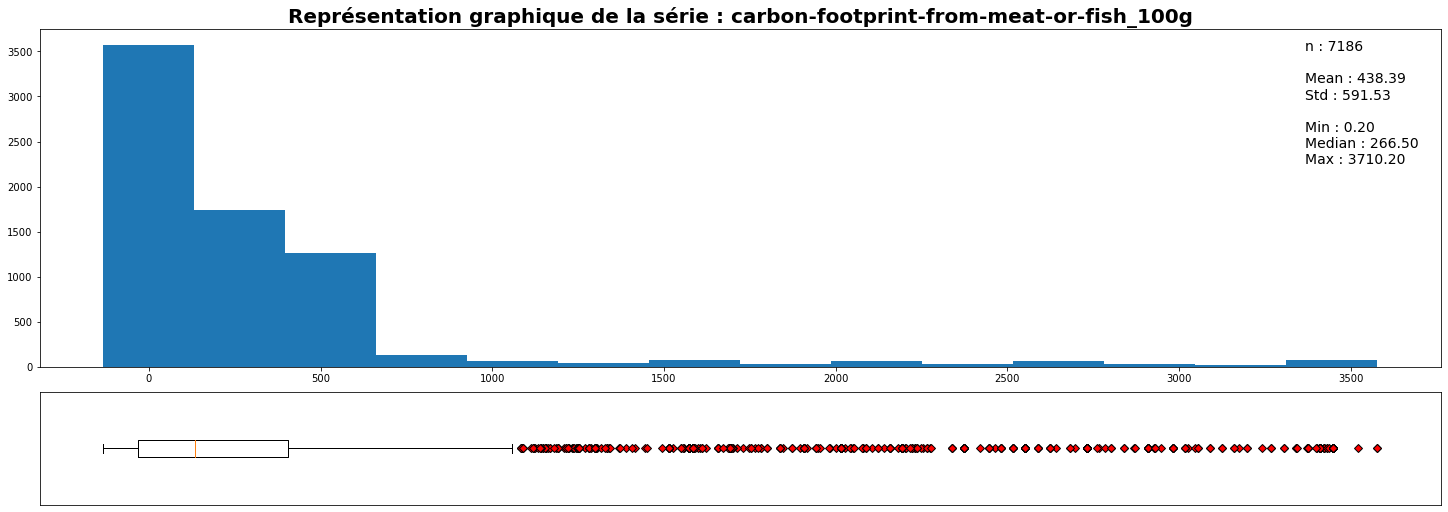

In [21]:
for i in df_healthe:
    bar_column(df_healthe[i])

In [22]:
df_corr = df_healthe.corr()

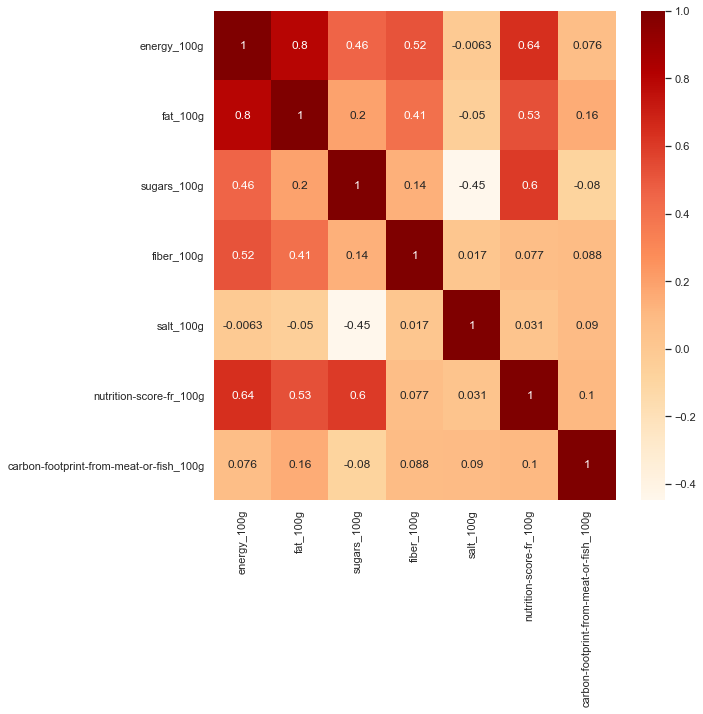

In [23]:
sns.set(rc={'figure.figsize':(9,9)})
sns.heatmap(df_corr, robust=True, annot=True, cmap='OrRd')

In [24]:
list_carbon = [13, 57, 54, 72, 74, 111, 127, 53, 171]
df_var = pd.DataFrame()

df_var = df.iloc[:,list_carbon]
df_var = df_var.dropna()
df_var

,brands_tags,pnns_groups_2,nutriscore_grade,energy_100g,fat_100g,sugars_100g,salt_100g,nutriscore_score,carbon-footprint-from-meat-or-fish_100g
65,crousresto,Bread,a,669.0,2.2,0.6,0.358,-4.0,401.80
625,bofrost,One-dish meals,c,828.0,7.2,0.5,1.800,4.0,313.60
1303,crous-languedoc-roussillon,Bread,b,874.0,8.3,3.2,1.200,2.0,245.00
1347,"crous-languedoc-roussillon,crous-resto",Sandwiches,c,929.0,3.3,1.8,1.700,9.0,616.42
1351,"crous-languedoc-roussillon,crous-resto",Sandwiches,a,879.0,0.9,4.3,0.800,-6.0,135.24
...,...,...,...,...,...,...,...,...,...
926823,dr-oetker,Pizza pies and quiche,c,987.0,11.0,4.7,0.900,5.0,45.14
926880,dr-oetker,Pizza pies and quiche,c,954.0,9.9,2.8,1.200,4.0,103.60
926883,dr-oetker,Pizza pies and quiche,d,1063.0,13.0,2.6,1.600,13.0,41.44
926884,dr-oetker,Pizza pies and quiche,c,903.0,8.4,5.4,1.100,4.0,50.32


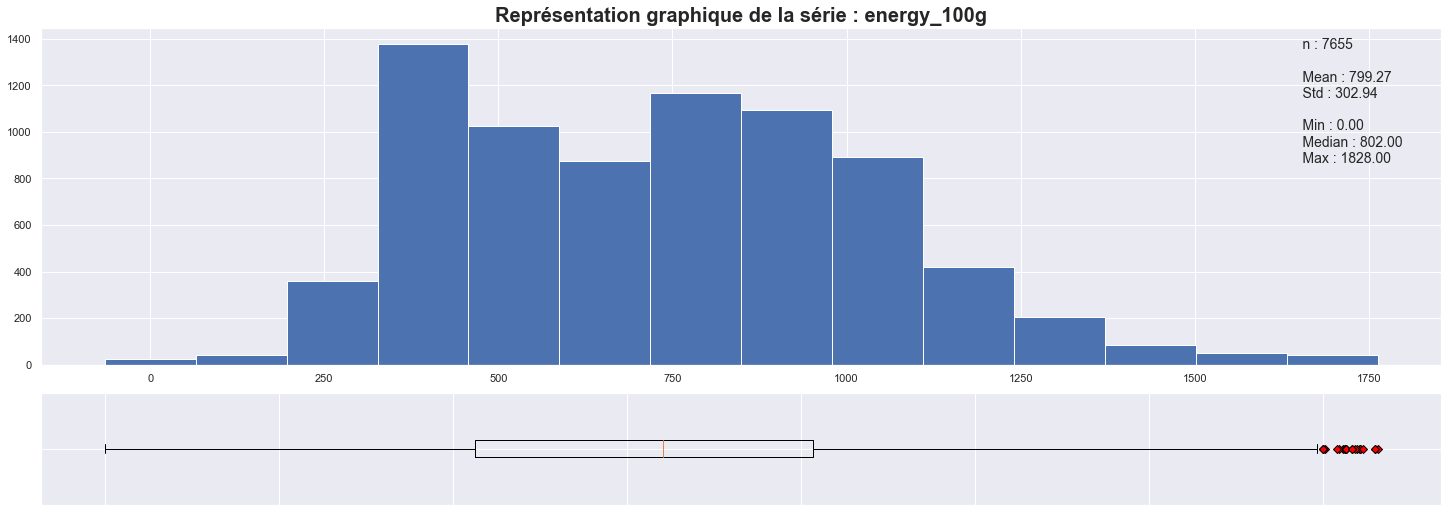

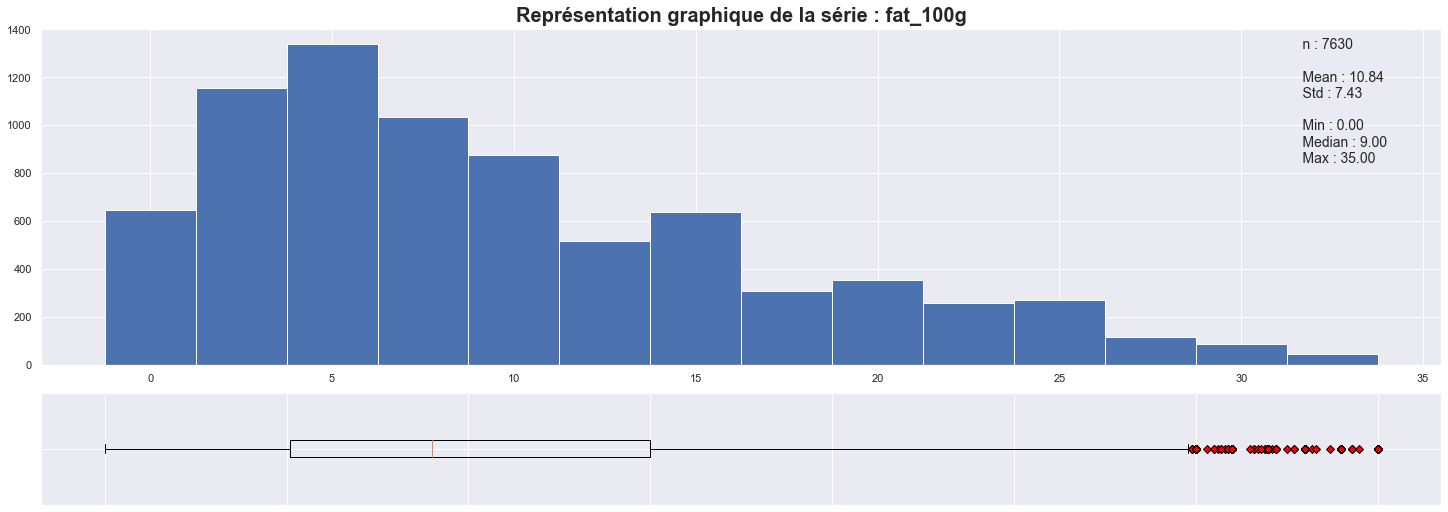

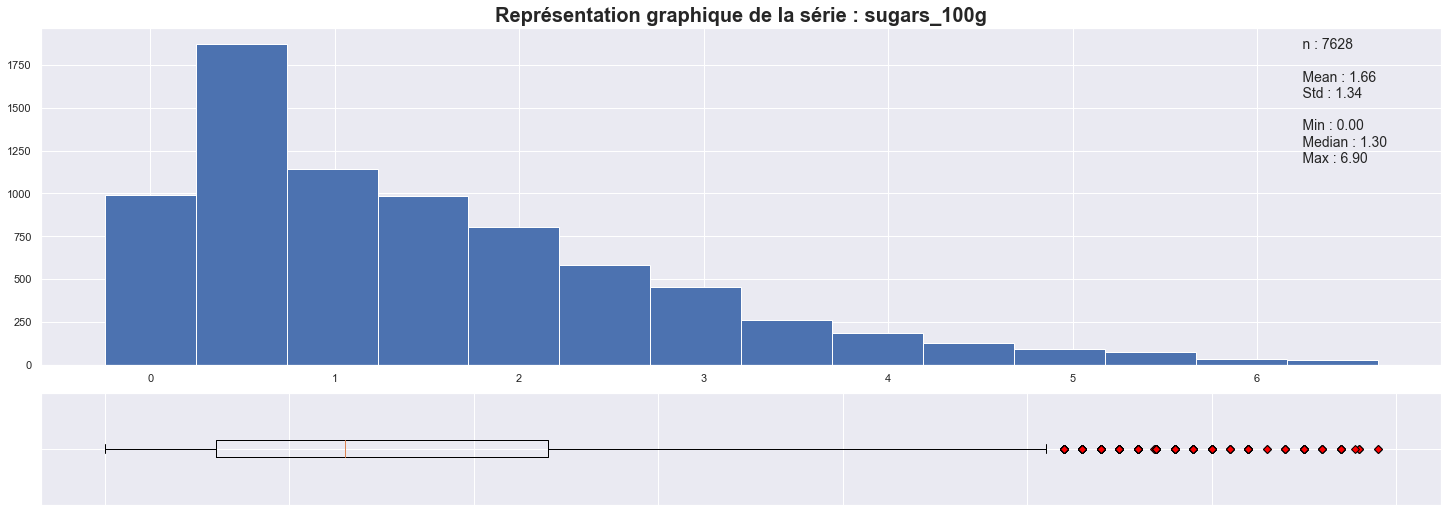

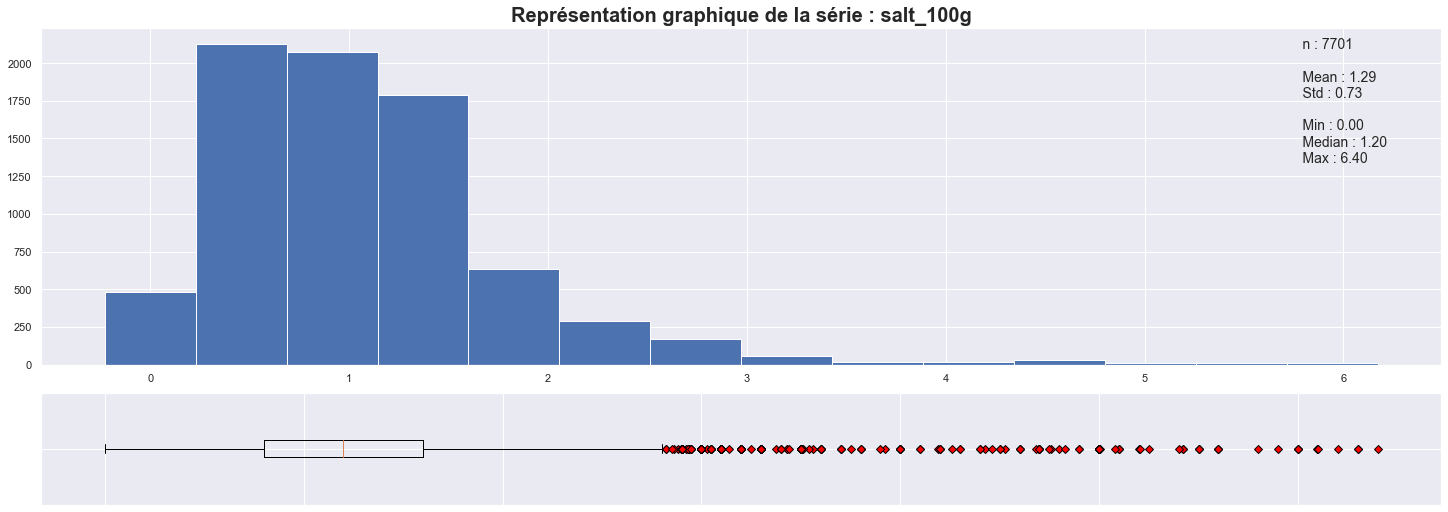

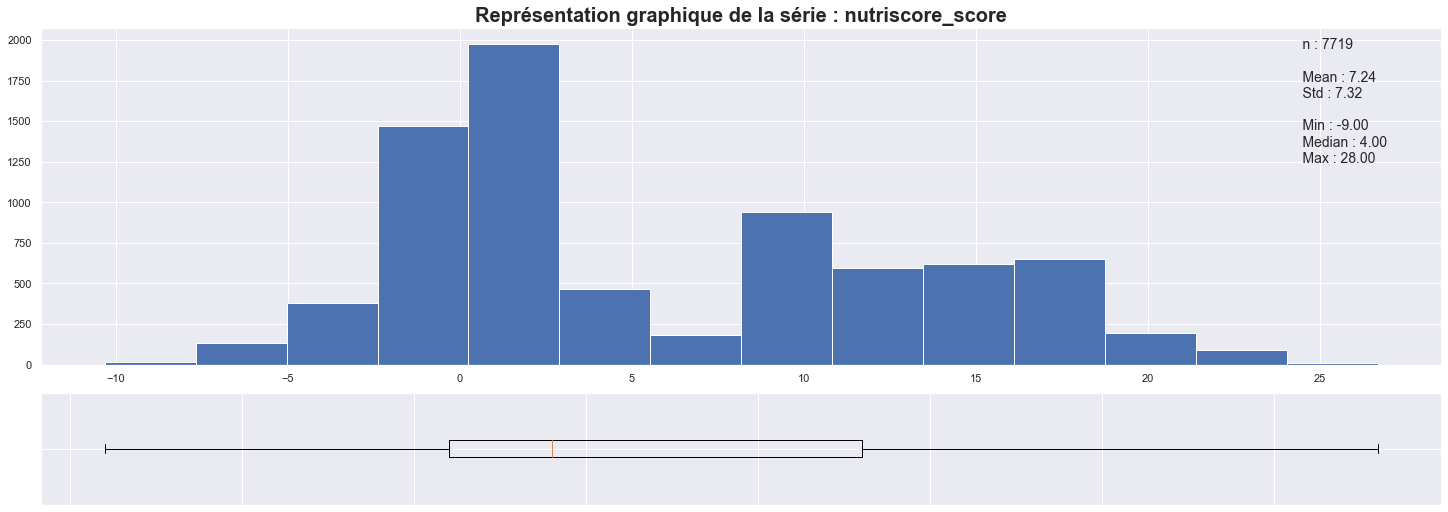

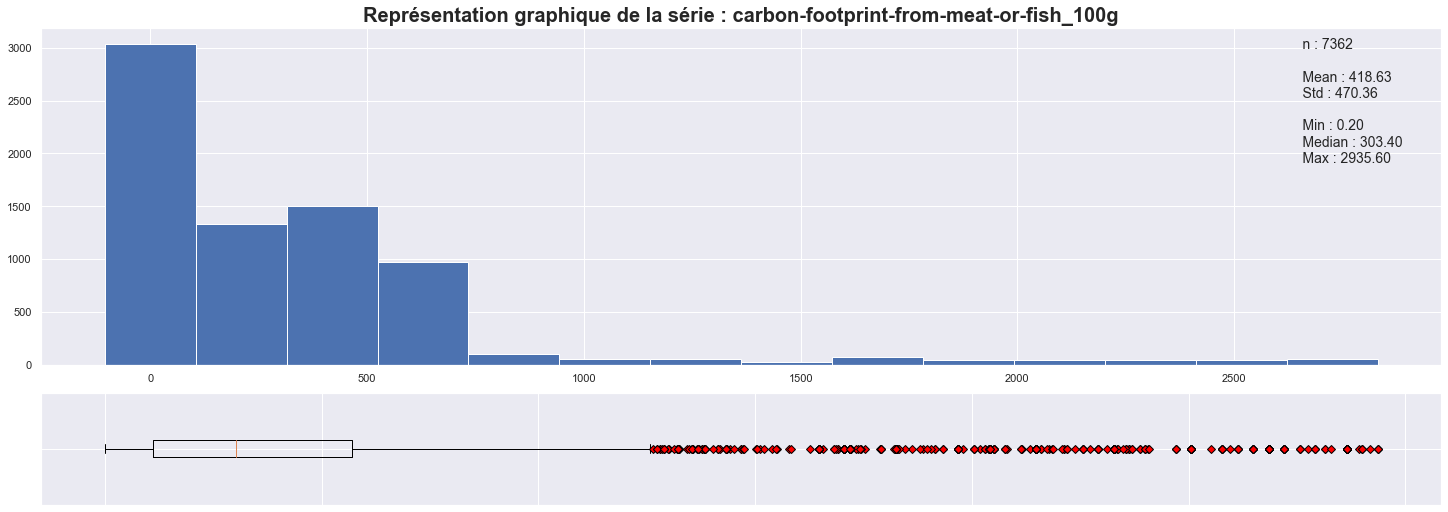

In [25]:
df_var['carbon-footprint-from-meat-or-fish_100g'] = df_var['carbon-footprint-from-meat-or-fish_100g'][df_var['carbon-footprint-from-meat-or-fish_100g'] < 6000]
df_carbon = pd.DataFrame()
for i in df_var.iloc[:, 3:]:
    ser = df_var[i]
    ser = ser[np.abs(ser - ser.mean()) / ser.std() < 3]
    df_carbon = df_carbon.append(ser)
    bar_column(ser)

df_carbon = df_carbon.T

In [26]:
df_carbon['brands_tag'] = df_var['brands_tags']
df_carbon['pnns_group2'] = df_var['pnns_groups_2']
df_carbon['nutriscore_grade'] = df_var['nutriscore_grade']

with pd.option_context('mode.use_inf_as_null', True):
    df_carbon = df_carbon.dropna()

In [27]:
df_carbon

,energy_100g,fat_100g,sugars_100g,salt_100g,nutriscore_score,carbon-footprint-from-meat-or-fish_100g,brands_tag,pnns_group2,nutriscore_grade
65,669.0,2.2,0.6,0.358,-4.0,401.80,crousresto,Bread,a
625,828.0,7.2,0.5,1.800,4.0,313.60,bofrost,One-dish meals,c
1303,874.0,8.3,3.2,1.200,2.0,245.00,crous-languedoc-roussillon,Bread,b
1347,929.0,3.3,1.8,1.700,9.0,616.42,"crous-languedoc-roussillon,crous-resto",Sandwiches,c
1351,879.0,0.9,4.3,0.800,-6.0,135.24,"crous-languedoc-roussillon,crous-resto",Sandwiches,a
...,...,...,...,...,...,...,...,...,...
926823,987.0,11.0,4.7,0.900,5.0,45.14,dr-oetker,Pizza pies and quiche,c
926880,954.0,9.9,2.8,1.200,4.0,103.60,dr-oetker,Pizza pies and quiche,c
926883,1063.0,13.0,2.6,1.600,13.0,41.44,dr-oetker,Pizza pies and quiche,d
926884,903.0,8.4,5.4,1.100,4.0,50.32,dr-oetker,Pizza pies and quiche,c


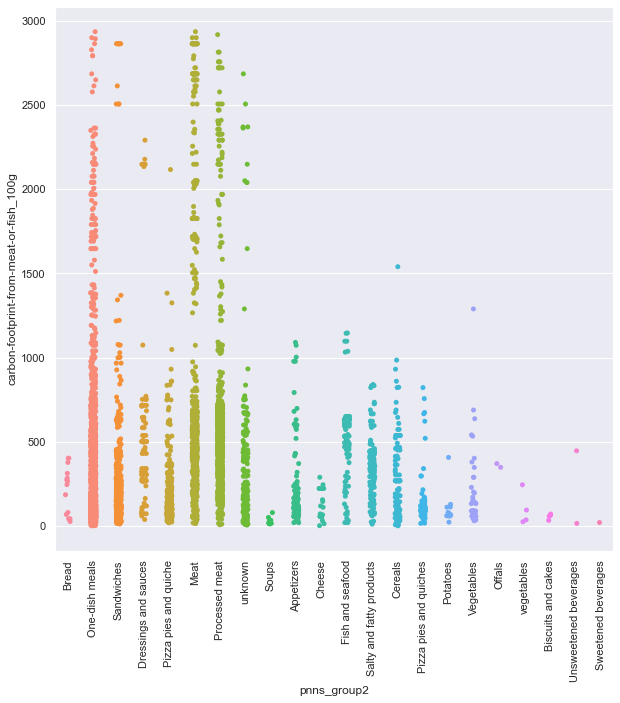

In [28]:
plt.figure(figsize=(10,10))
sns.stripplot(data=df_carbon, x='pnns_group2', y='carbon-footprint-from-meat-or-fish_100g')
plt.xticks(rotation=90);
plt.savefig('xxx')

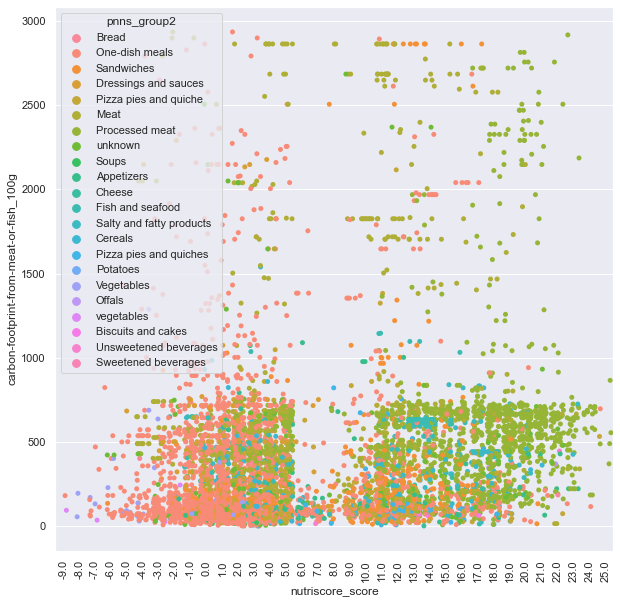

In [29]:
plt.figure(figsize=(10,10))
sns.stripplot(data=df_carbon, x='nutriscore_score', y='carbon-footprint-from-meat-or-fish_100g', 
              hue='pnns_group2', jitter=0.4)
plt.xticks(rotation=90);

In [347]:
df_brands = df_carbon.groupby(['brands_tag']).count().sort_values(['carbon-footprint-from-meat-or-fish_100g'], ascending=False)
a = df_brands.head(20)
a.index

Index(['u', 'carrefour', 'auchan', 'casino', 'picard', 'le-gaulois',
       'fleury-michon', 'leader-price', 'maitre-coq', 'cora', 'monoprix',
       'cote-table,marque-repere', 'netto', 'monique-ranou', 'thiriet',
       'marie', 'belle-france', 'daunat', 'pere-dodu', 'panzani'],
      dtype='object', name='brands_tag')

<Figure size 720x720 with 0 Axes>

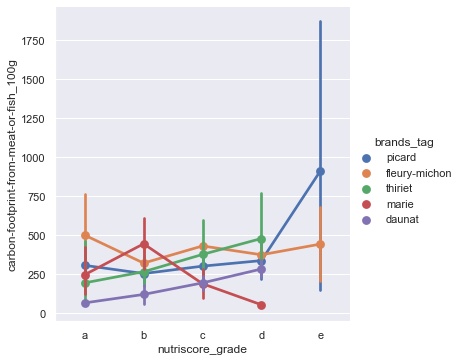

In [37]:
plt.figure(figsize=(10, 10))
sns.catplot(data=df_carbon,
            x='nutriscore_grade',
            y='carbon-footprint-from-meat-or-fish_100g',
            order=['a', 'b', 'c', 'd', 'e'],
            hue='brands_tag',
            hue_order=[
                'picard', 'fleury-michon', 'thiriet',
                'marie', 'daunat'
            ],
            kind='point',
            legend_out=True)

<Figure size 720x720 with 0 Axes>

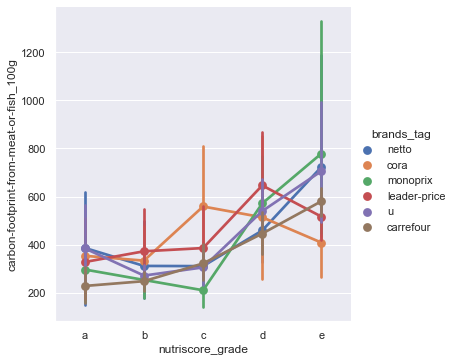

In [36]:
plt.figure(figsize=(10, 10))
sns.catplot(data=df_carbon,
            x='nutriscore_grade',
            y='carbon-footprint-from-meat-or-fish_100g',
            order=['a', 'b', 'c', 'd', 'e'],
            hue='brands_tag',
            hue_order=[
                'netto',
                'cora',
                'monoprix',
                'leader-price',
                'u',
                'carrefour',
            ],
            kind='point',
            legend_out=True)